# Diabetes readmission
by Samokhvalov Mikhail, Moscow 2018

## Research plan
 - [Part 1. Dataset and features description](#part1)
 - [Part 2. Exploratory data analysis](#part2)
 - [Part 3. Visual analysis of the features](#part3)
  - 3.1. Univariate analisys
  - 3.2. Bi-variate Analysis
    - 3.2.1. Continuous & Continuous
    - 3.2.2. Categorical & Categorical
    - 3.2.3. 3.2.3 Numeric & Categorical
 - [Part 4. Patterns, insights, peculiarities of data](#part4)
 - [Part 5. Data preprocessing](#part5)
 - [Part 6. Feature engineering and description](#part6)
 - [Part 7. Cross-validation, hyperparameter tuning](#part7)
 - [Part 8. Validation and learning curves](#part8)
 - [Part 9. Prediction for test samples](#part9)
 - [Part 10. Model evaluation with metrics description](#part10)
 - [Part 11. Conclusions](#part11)
 

## Part 1. Dataset and features description <a class="anchor" id="part1"></a>

### 1.1. Dataset description from Kaggle

https://www.kaggle.com/brandao/diabetes/home
#### Basic Explanaition
It is important to know if a patient will be readmitted in some hospital. The reason is that you can change the treatment, in order to avoid a readmission.

In this database, you have 3 different outputs:

  * No readmission;
  * A readmission in less than 30 days (this situation is not good, because maybe your treatment was not appropriate);
  * A readmission in more than 30 days (this one is not so good as well the last one, however, the reason can be the state of the patient.
  
In this context, you can see different objective functions for the problem. You can try to figure out situations where the patient will not be readmitted, or if their are going to be readmitted in less than 30 days (because the problem can the the treatment), etc.

#### Content

"The data set represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria.

It is an inpatient encounter (a hospital admission).
It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis.
The length of stay was at least 1 day and at most 14 days.
Laboratory tests were performed during the encounter.
Medications were administered during the encounter.
The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab test performed, HbA1c test result, diagnosis, number of medication, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc."

  * https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008

#### Source

The data are submitted on behalf of the Center for Clinical and Translational Research, Virginia Commonwealth University, a recipient of NIH CTSA grant UL1 TR00058 and a recipient of the CERNER data. John Clore (jclore '@' vcu.edu), Krzysztof J. Cios (kcios '@' vcu.edu), Jon DeShazo (jpdeshazo '@' vcu.edu), and Beata Strack (strackb '@' vcu.edu). This data is a de-identified abstract of the Health Facts database (Cerner Corporation, Kansas City, MO).

### 1.2. Feature description

First of all lets get features description from the article and convert in to **markdown** for better readable. Also lets map them to dataframe names.

| Feature name                | Name in dataframe                                                                                                                                                                                                                                                                                                           | Type    | Description and values                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     | % missing |
|-----------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------|
| Encounter ID                | encounter_id                                                                                                                                                                                                                                                                                                                | Numeric | Unique identifier of an encounter                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          | 0         |
| Patient number              | patient_nbr                                                                                                                                                                                                                                                                                                                 | Numeric | Unique identifier of a patient                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             | 0         |
| Race                        | race                                                                                                                                                                                                                                                                                                                        | Nominal | Values: Caucasian, Asian, African American, Hispanic, and other                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            | 2         |
| Gender                      | gender                                                                                                                                                                                                                                                                                                                      | Nominal | Values: male, female, and unknown/invalid                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  | 0         |
| Age                         | age                                                                                                                                                                                                                                                                                                                         | Nominal | Grouped in 10-year intervals: [0, 10), [10, 20), . . ., [90, 100)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          | 0         |
| Weight                      | weight                                                                                                                                                                                                                                                                                                                      | Numeric | Weight in pounds.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          | 97        |
| Admission type              | admission_type_id                                                                                                                                                                                                                                                                                                           | Nominal | Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                | 0         |
| Discharge disposition       | discharge_disposition_id                                                                                                                                                                                                                                                                                                    | Nominal | Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        | 0         |
| Admission source            | admission_source_id                                                                                                                                                                                                                                                                                                         | Nominal | Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      | 0         |
| Time in hospital            | time_in_hospital                                                                                                                                                                                                                                                                                                            | Numeric | Integer number of days between admission and discharge                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     | 0         |
| Payer code                  | payer_code                                                                                                                                                                                                                                                                                                                  | Nominal | Integer identifier corresponding to 23 distinct values, for example, Blue Cross\Blue Shield, Medicare, and self-pay                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        | 52        |
| Medical specialty           | medical_specialty                                                                                                                                                                                                                                                                                                           | Nominal | Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family\general practice, and surgeon                                                                                                                                                                                                                                                                                                                                                                                                                                                                        | 53        |
| Number of lab procedures    | num_lab_procedures                                                                                                                                                                                                                                                                                                          | Numeric | Number of lab tests performed during the encounter                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         | 0         |
| Number of procedures        | num_procedures                                                                                                                                                                                                                                                                                                              | Numeric | Number of procedures (other than lab tests) performed during the encounter                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 | 0         |
| Number of medications       | num_medications                                                                                                                                                                                                                                                                                                             | Numeric | Number of distinct generic names administered during the encounter                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         | 0         |
| Number of outpatient visits | number_outpatient                                                                                                                                                                                                                                                                                                           | Numeric | Number of outpatient visits of the patient in the year preceding the encounter                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             | 0         |
| Number of emergency visits  | number_emergency                                                                                                                                                                                                                                                                                                            | Numeric | Number of emergency visits of the patient in the year preceding the encounter                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              | 0         |
| Number of inpatient visits  | number_inpatient                                                                                                                                                                                                                                                                                                            | Numeric | Number of inpatient visits of the patient in the year preceding the encounter                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              | 0         |
| Diagnosis 1                 | diag_1                                                                                                                                                                                                                                                                                                                      | Nominal | The primary diagnosis (coded as first three digits of ICD9); 848 distinct values                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           | 0         |
| Diagnosis 2                 | diag_2                                                                                                                                                                                                                                                                                                                      | Nominal | Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             | 0         |
| Diagnosis 3                 | diag_3                                                                                                                                                                                                                                                                                                                      | Nominal | Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  | 1         |
| Number of diagnoses         | number_diagnoses                                                                                                                                                                                                                                                                                                            | Numeric | Number of diagnoses entered to the system                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  | 0         |
| Glucose serum test result   | max_glu_serum                                                                                                                                                                                                                                                                                                               | Nominal | Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               | 0         |
| A1c test result             | A1Cresult                                                                                                                                                                                                                                                                                                                   | Nominal | Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.                                                                                                                                                                                                                                                                                                                                                                                                              | 0         |
| Change of medications       | change                                                                                                                                                                                                                                                                                                                      | Nominal | Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  | 0         |
| Diabetes medications        | diabetesMed                                                                                                                                                                                                                                                                                                                 | Nominal | Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          | 0         |
| 24 features for medications | metformin repaglinide nateglinide chlorpropamide glimepiride acetohexamide glipizide glyburide tolbutamide pioglitazone rosiglitazone acarbose miglitol troglitazone tolazamide examide citoglipton insulin glyburide-metformin glipizide-metformin glimepiride-pioglitazone metformin-rosiglitazone metformin-pioglitazone | Nominal | For the generic names: metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride-pioglitazone, metformin-rosiglitazone, and metformin-pioglitazone, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed | 0         |
| Readmitted                  | readmitted                                                                                                                                                                                                                                                                                                                  | Nominal | Days to inpatient readmission. Values: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission.                                                                                                                                                                                                                                                                                                                                                                                                                                                          | 0         |

#### Output variable
**Last one feature - readmitted feature - is a target.**

## **Part 2. Exploratory data analysis** <a class="anchor" id="part2"></a>
### 2.1. Loading data

In [837]:
# Loading all necessary libraries:
import zipfile
import missingno as msno
from tqdm import tqdm_notebook
import itertools

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

from sklearn.impute import SimpleImputer #sklearn 0.20.1 is necessary
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [838]:
# We can read files without unzipping!
with zipfile.ZipFile("diabetes.zip") as z:
    with z.open("diabetic_data.csv") as f:
        data_df = pd.read_csv(f, encoding='utf-8')


In [839]:
data_df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [840]:
data_df.dtypes.head()

encounter_id     int64
patient_nbr      int64
race            object
gender          object
age             object
dtype: object

In [841]:
# Lets take a look at the data:
display(data_df.describe())
data_size = len(data_df)
print(f'Whole dataset size: {data_size}')

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


Whole dataset size: 101766


### 2.2. Train test split
As we got entire dataset here we need to split it to two parts: train and test and never spy to the test target array. We will use test target for checking our final solution.

Data could be collected in chronological order. Therefore, to make the experiment more realistic, we divide the sample in half.


In [842]:
total_len = len(data_df)
print('Total length: ', total_len)
split_coef = 0.5
split_number = int(total_len*split_coef)
print('Split number: ', split_number)

X_train = data_df.iloc[0:split_number]
X_test = data_df.iloc[split_number:]

y_train = X_train['readmitted']
y_test = X_test['readmitted']

X_train = X_train.drop(columns='readmitted')
X_test = X_test.drop(columns='readmitted')

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# Also for the baseline lets convert y_target to numeric in this way:
y_target = y_train.map({'<30':0, '>30':1, 'NO':2})
y_test = y_test.map({'<30':0, '>30':1, 'NO':2})


Total length:  101766
Split number:  50883
(50883, 49) (50883,)
(50883, 49) (50883,)


### 2.3. Filling missings

In [843]:
# Lets check missings:
for col in data_df:
    uniq_values = data_df[col].unique()
    if '?' in uniq_values:
        num_of_nan = len(data_df[data_df[col]=='?'])
        print(f'Feature {col}, missed: {num_of_nan} or {num_of_nan/data_size*100:.2f} %') 
        # adding here uniq_values we can see all of them. Ans see missings as '?' always

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.


Feature race, missed: 2273 or 2.23 %
Feature weight, missed: 98569 or 96.86 %
Feature payer_code, missed: 40256 or 39.56 %
Feature medical_specialty, missed: 49949 or 49.08 %
Feature diag_1, missed: 21 or 0.02 %
Feature diag_2, missed: 358 or 0.35 %
Feature diag_3, missed: 1423 or 1.40 %


Here we found missing values in dataset marked as **'?'**. Also there are '?' not only in features as shown in the article, but also in `diag_1` and `diag_2` features too!

There are several methods to fill in the missings:
1. drop nans
2. fill with constant (0, -1, ...)
3. fill with mean/median/moda
4. groupby and fill with mean/median of the group
5. built model to predict missings
6. some methods can handle missings!

Good example of using different methods:
https://towardsdatascience.com/working-with-missing-data-in-machine-learning-9c0a430df4ce

**Important moment - we can't just drop missings in data - model should be able to work with missing values because we can't ignore any new patient just because he/she didn't indicate weight or race in the questionary.**



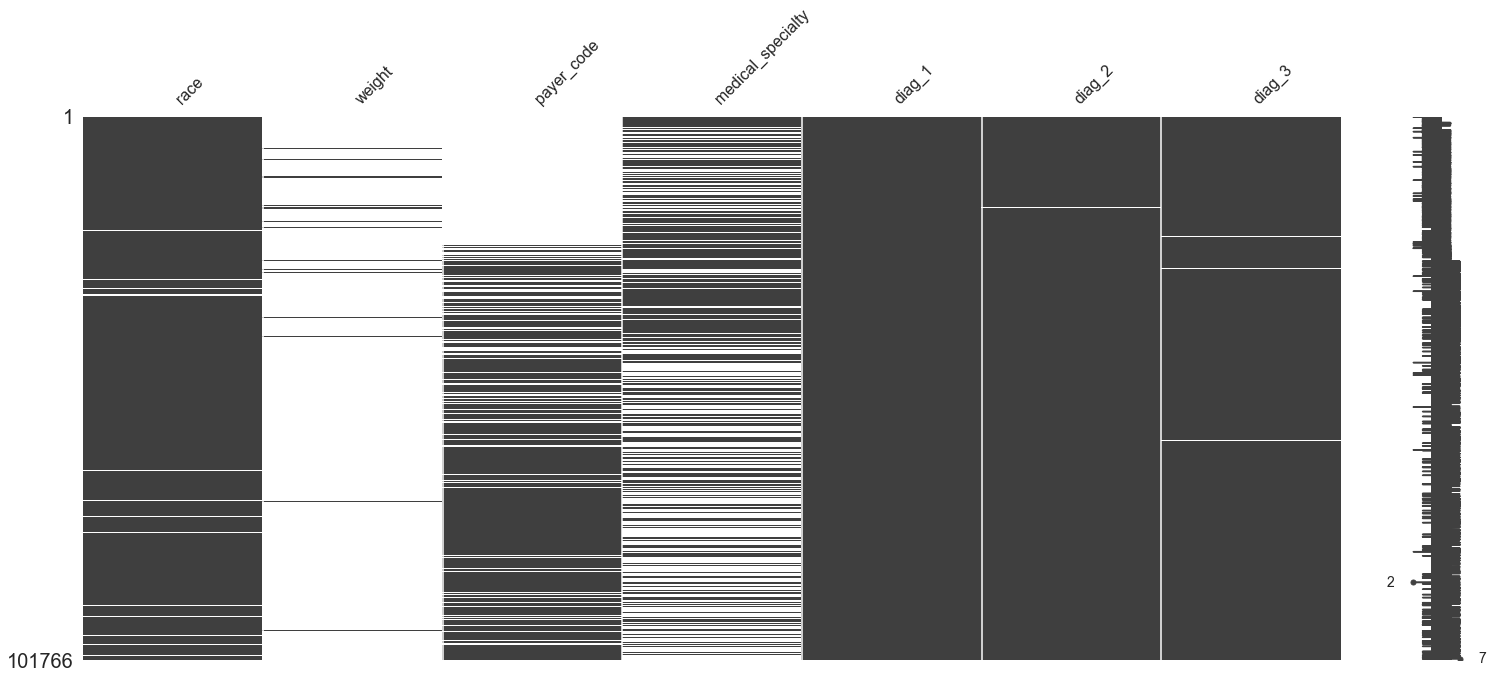

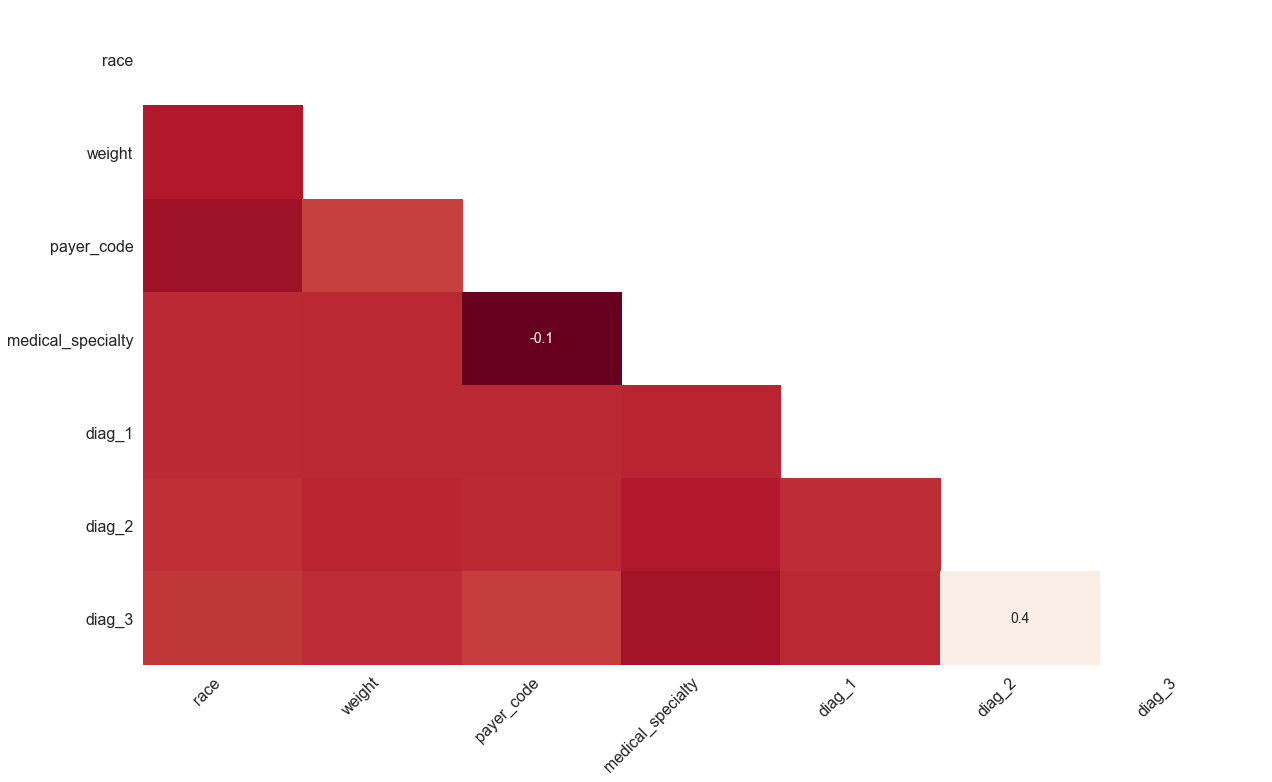

In [844]:
# interesting method to visualize missings:

columns_nans = ['race', 'weight', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3']

imp = SimpleImputer(missing_values='?', strategy='constant', fill_value=np.nan)

data_df_nans = pd.DataFrame(imp.fit_transform(data_df[columns_nans]), columns=columns_nans)
msno.matrix(data_df_nans);
msno.heatmap(data_df_nans);


There is no correlation in missings (they doesn't appear simultaneously).
Three theatures have too many missings: weight, payer_code, medical_specialty - from 40 to 97%.
So it can be unsafe to fill them with any values.
**Let's ignore them for baseline** and try different filling methods at tuning stage.

Let's try different methods - start from the simplest one for baseline model and come back here and try another methods for more complex model. We will change data always in new columns and drop excess data before using each model.


 - Baseline model: fill with most frequent value

In [845]:
%%time
columns_nans = ['race', 'diag_1', 'diag_2', 'diag_3']
imp_most_frequent = SimpleImputer(missing_values='?', strategy='most_frequent', verbose=1)
X_train_nan_most_frequent = pd.DataFrame(imp_most_frequent.fit_transform(X_train[columns_nans]),
                                         columns=[el+'_mf' for el in columns_nans] )
X_test_nan_most_frequent = pd.DataFrame(imp_most_frequent.transform(X_test[columns_nans]),
                                         columns=[el+'_mf' for el in columns_nans] )

X_train = pd.concat([X_train, X_train_nan_most_frequent], axis=1)
X_test = pd.concat([X_test.reset_index(drop=True), X_test_nan_most_frequent], axis=1).set_index(X_test.index)


Wall time: 3.33 s


## Part 3. Visual analysis of the features  <a class="anchor" id="part3"></a>

### 3.1. Univariate analisys
Lets do some data analisys. First of all we check numeric data, then categorical and finish with cat vs num data comparison. 
Very good example about general methods for data analisys: # https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/

In [846]:
features_numeric = X_train.select_dtypes(include='int64').columns
features_categorical = X_train.select_dtypes(include='object').columns

print(features_numeric)
print(len(features_numeric))
print(features_categorical)
print(len(features_categorical))

Index(['encounter_id', 'patient_nbr', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses'],
      dtype='object')
13
Index(['race', 'gender', 'age', 'weight', 'payer_code', 'medical_specialty',
       'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'race_mf',
       'diag_1_mf', 'diag_2_mf', 'diag_3_mf'],
      dtype='ob

**Lets take a look at numeric first ...**

In [847]:
X_train[features_numeric].drop(columns=['encounter_id', 'patient_nbr']).describe()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,50883.000000,50883.000000,50883.000000,50883.000000,50883.000000,50883.000000,50883.000000,50883.000000,50883.000000,50883.000000,50883.000000
mean,2.228839,4.269540,6.301024,4.554370,42.328224,1.369868,15.286048,0.222432,0.124894,0.582532,6.911483
std,1.621665,6.019788,4.779297,3.087251,19.323138,1.687201,8.131921,0.869751,0.623733,1.198313,2.023880
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,1.000000,1.000000,2.000000,30.000000,0.000000,10.000000,0.000000,0.000000,0.000000,5.000000
50%,2.000000,1.000000,7.000000,4.000000,43.000000,1.000000,14.000000,0.000000,0.000000,0.000000,7.000000
75%,3.000000,5.000000,7.000000,6.000000,56.000000,2.000000,19.000000,0.000000,0.000000,1.000000,9.000000
max,8.000000,28.000000,20.000000,14.000000,129.000000,6.000000,81.000000,36.000000,42.000000,21.000000,9.000000


In [848]:
for col in features_numeric[2:]:
    print(col)
    print(X_train[col].value_counts())
    print(X_test[col].value_counts())

admission_type_id
1    24753
2     9859
3     8540
6     4199
5     3367
8      156
4        7
7        2
Name: admission_type_id, dtype: int64
1    29237
3    10329
2     8621
5     1418
6     1092
8      164
7       19
4        3
Name: admission_type_id, dtype: int64
discharge_disposition_id
1     29888
3      5968
6      5427
18     3668
2      1002
25      975
5       957
11      868
22      727
4       499
7       277
23      189
14      137
13      110
8        98
28       24
15       22
17       14
16       11
10        6
9         4
24        4
12        3
19        2
20        2
27        1
Name: discharge_disposition_id, dtype: int64
1     30346
3      7986
6      7475
22     1266
2      1126
11      774
7       346
4       316
13      289
14      235
5       227
23      223
28      115
24       44
15       41
18       23
9        17
25       14
8        10
19        6
27        4
Name: discharge_disposition_id, dtype: int64
admission_source_id
7     24545
1     13979
17     

Wall time: 1.37 s


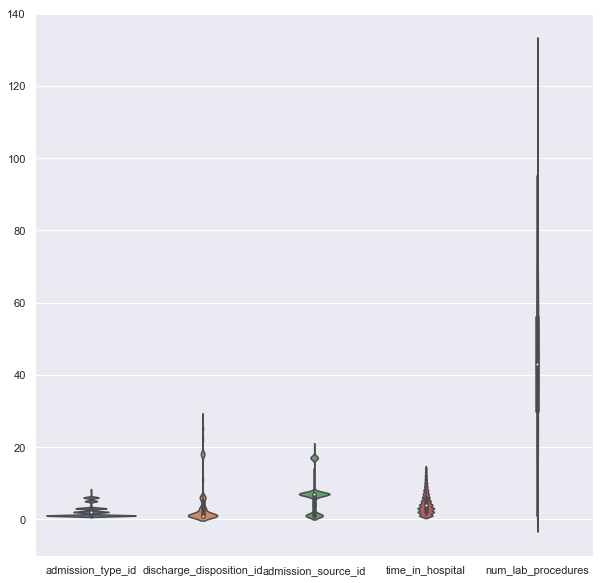

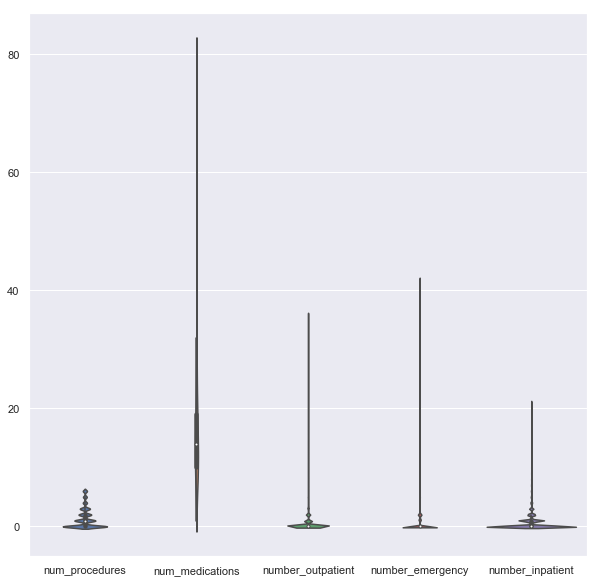

In [849]:
%%time
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(10,10)})
#sns.boxplot(data=X_train[features_numeric].drop(columns=['encounter_id', 'patient_nbr']).iloc[:,[1,2,3,4,6,10]]);
#sns.swarmplot(data=X_train[features_numeric].drop(columns=['encounter_id', 'patient_nbr']).iloc[::100,[1,2,3,4,6,10]], color=".25")
sns.violinplot(data=X_train[features_numeric].drop(columns=['encounter_id', 'patient_nbr']).iloc[:,0:5]);
#sns.boxplot(data=X_train[features_numeric].drop(columns=['encounter_id', 'patient_nbr']).iloc[:,[0,5,7,8,9]]);
#sns.swarmplot(data=X_train[features_numeric].drop(columns=['encounter_id', 'patient_nbr']).iloc[::100,[0,5,7,8,9]], color=".25")
plt.figure()
sns.violinplot(data=X_train[features_numeric].drop(columns=['encounter_id', 'patient_nbr']).iloc[:,5:10]);

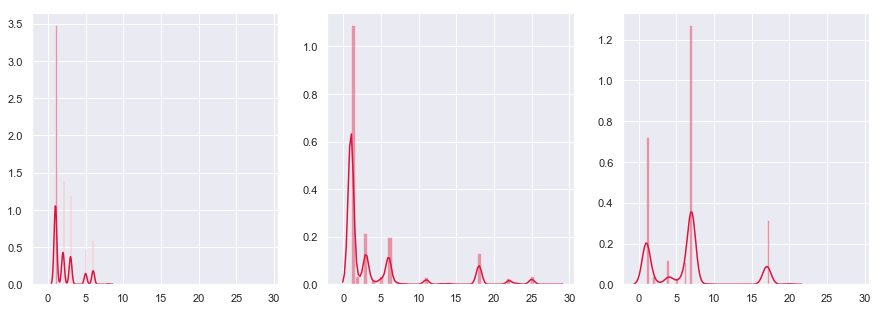

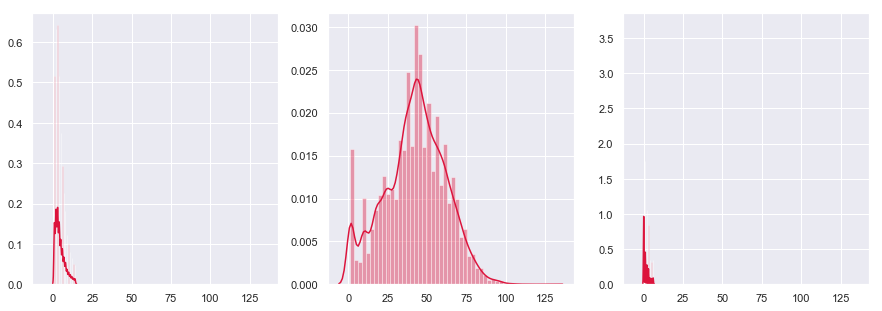

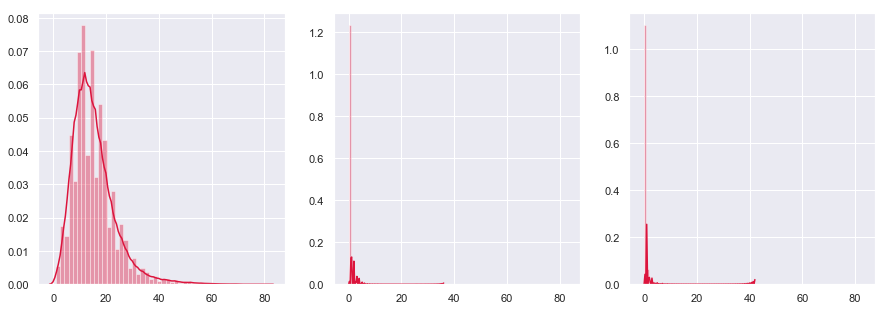

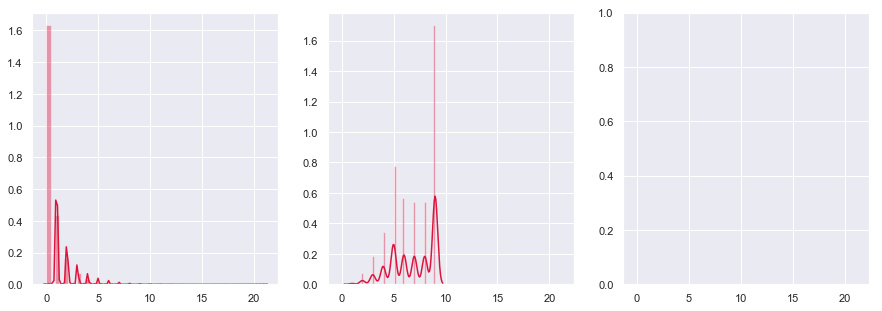

In [850]:
sns.set(rc={'figure.figsize':(15,5)})
for axis in range(0,len(X_train[features_numeric[2:]].columns),3):
    cols = X_train[features_numeric[2:]].columns[axis:axis+3]
    f, axes = plt.subplots(1, 3, sharex=True)
    palette = "crimson"
    sns.distplot( X_train[cols[0]].values , color=palette, ax=axes[0]);
    try:
        sns.distplot( X_train[cols[1]].values , color=palette, ax=axes[1], label=cols[1]);
    except:
        pass
    try:
        sns.distplot( X_train[cols[2]].values , color=palette, ax=axes[2], label=cols[2]);
    except:
        pass


**... and categorical.**

In [851]:
features_ignored = ['weight', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'race']
X_train_categorical = X_train[features_categorical].drop(columns=features_ignored)
features_categorical = [el for el in features_categorical if el not in features_ignored]

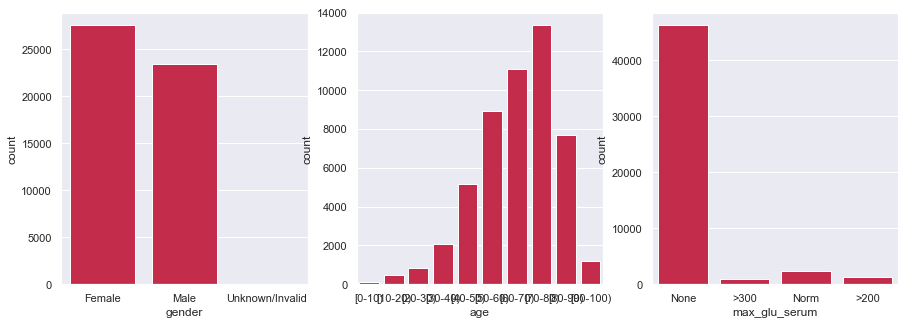

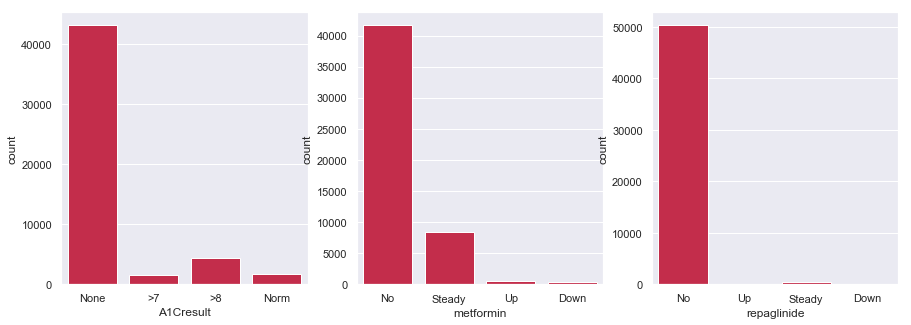

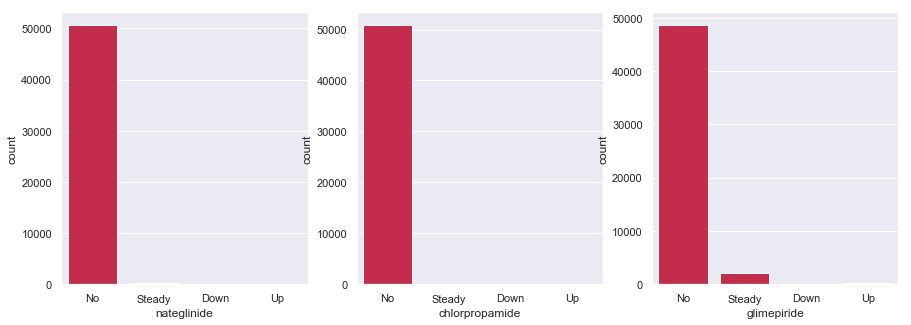

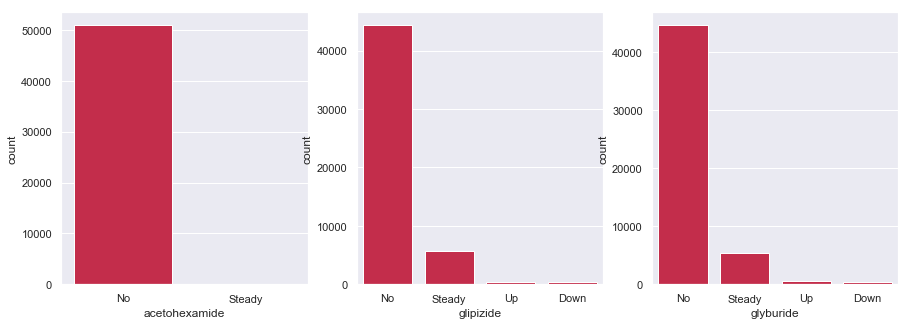

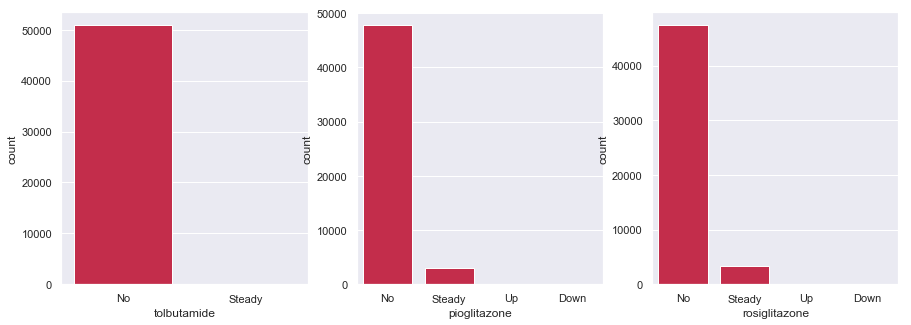

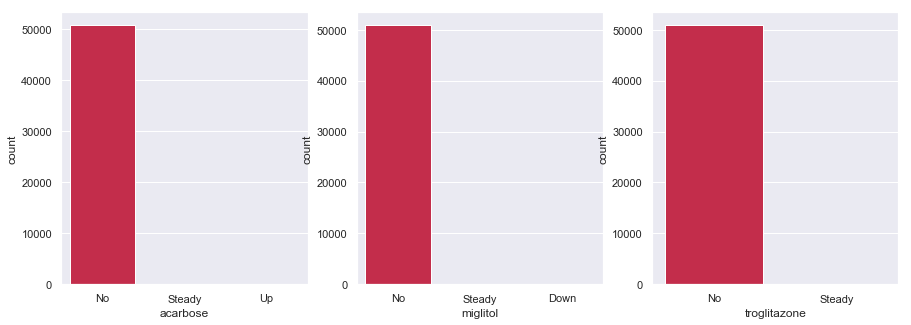

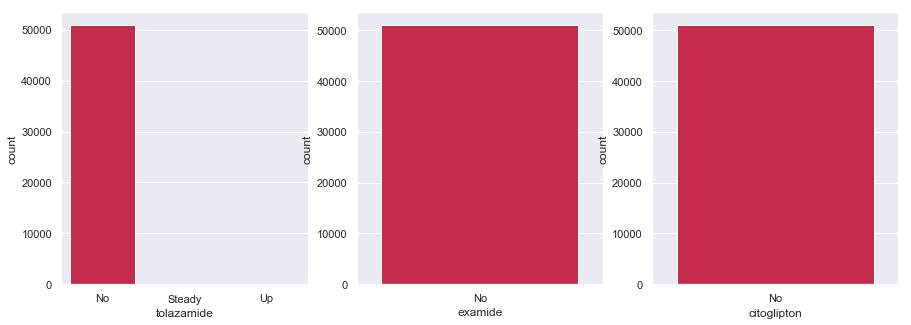

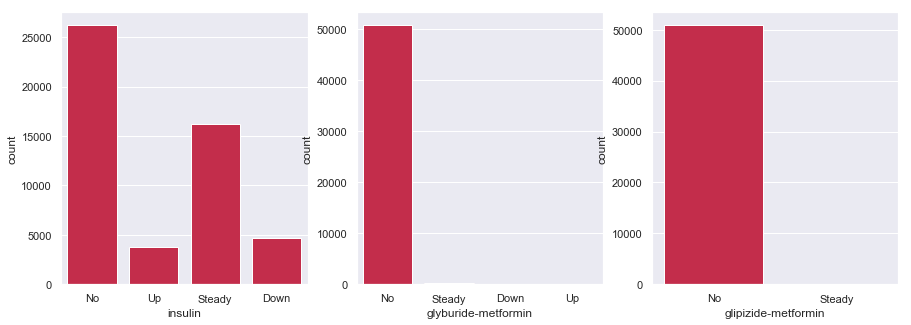

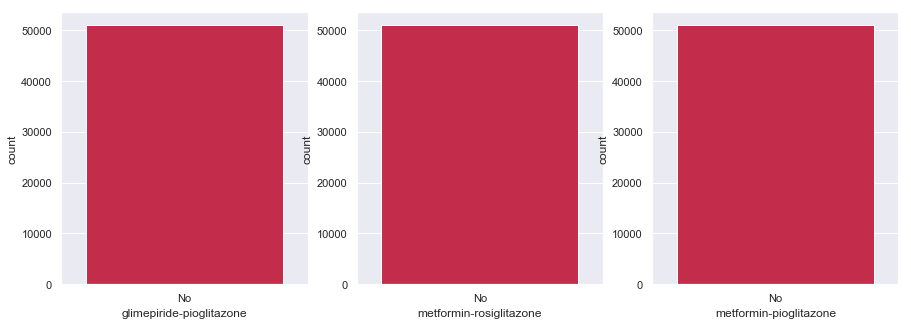

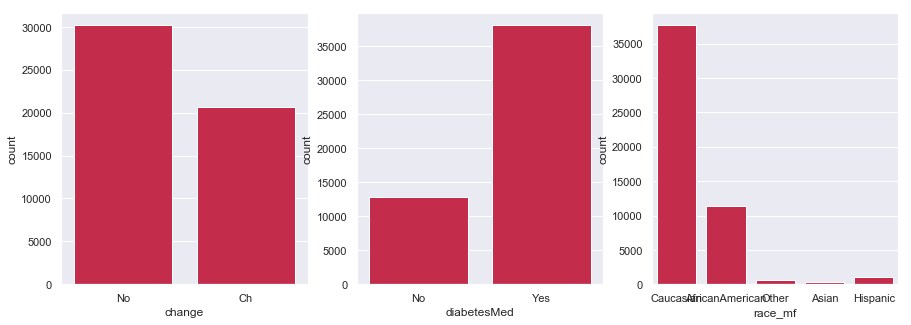

In [852]:
for axis in range(0,len(X_train_categorical.columns[:-3]),3):
    cols = X_train_categorical.columns[axis:axis+3]
    f, axes = plt.subplots(1, 3)
    palette = "crimson"
    sns.countplot(X_train_categorical[cols[0]] , color=palette, ax=axes[0]);
    try:
        sns.countplot(X_train_categorical[cols[1]] , color=palette, ax=axes[1]);
    except:
        pass
    try:
        sns.countplot(X_train_categorical[cols[2]] , color=palette, ax=axes[2]);
    except:
        pass

In [853]:
X_train_categorical[['diag_1_mf', 'diag_2_mf', 'diag_3_mf']] \
                    .apply(pd.Series.value_counts) \
                    .sort_values('diag_3_mf', ascending=False)

,diag_1_mf,diag_2_mf,diag_3_mf
250,96.0,3436.0,7430.0
401,173.0,2062.0,4502.0
428,3530.0,3806.0,2261.0
276,967.0,3221.0,2253.0
427,1276.0,2546.0,1982.0
414,3897.0,1378.0,1939.0
496,44.0,1771.0,1322.0
403,238.0,1593.0,1059.0
272,4.0,199.0,966.0
599,653.0,1506.0,899.0


In [854]:
for col in X_train_categorical.columns[:-3]:
    print(col, X_train_categorical[col].unique())
    print('---'*10)
    print(X_train_categorical[col].value_counts())

gender ['Female' 'Male' 'Unknown/Invalid']
------------------------------
Female             27486
Male               23396
Unknown/Invalid        1
Name: gender, dtype: int64
age ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
------------------------------
[70-80)     13316
[60-70)     11059
[50-60)      8927
[80-90)      7681
[40-50)      5137
[30-40)      2093
[90-100)     1207
[20-30)       853
[10-20)       472
[0-10)        138
Name: age, dtype: int64
max_glu_serum ['None' '>300' 'Norm' '>200']
------------------------------
None    46235
Norm     2361
>200     1375
>300      912
Name: max_glu_serum, dtype: int64
A1Cresult ['None' '>7' '>8' 'Norm']
------------------------------
None    43168
>8       4397
Norm     1723
>7       1595
Name: A1Cresult, dtype: int64
metformin ['No' 'Steady' 'Up' 'Down']
------------------------------
No        41635
Steady     8381
Up          579
Down        288
Name: metformin, dtype: int64
r

In [855]:
constant_features = ['examide', 'citoglipton', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone',
                     'acetohexamide', 
                     'tolbutamide', 'miglitol', 'troglitazone', 'tolazamide', 'glipizide-metformin']
for col in constant_features:
    print(col)
    print(X_train[col].value_counts())
    print(X_test[col].value_counts())
    print('---'*10)

examide
No    50883
Name: examide, dtype: int64
No    50883
Name: examide, dtype: int64
------------------------------
citoglipton
No    50883
Name: citoglipton, dtype: int64
No    50883
Name: citoglipton, dtype: int64
------------------------------
glimepiride-pioglitazone
No    50883
Name: glimepiride-pioglitazone, dtype: int64
No        50882
Steady        1
Name: glimepiride-pioglitazone, dtype: int64
------------------------------
metformin-rosiglitazone
No    50883
Name: metformin-rosiglitazone, dtype: int64
No        50881
Steady        2
Name: metformin-rosiglitazone, dtype: int64
------------------------------
metformin-pioglitazone
No    50883
Name: metformin-pioglitazone, dtype: int64
No        50882
Steady        1
Name: metformin-pioglitazone, dtype: int64
------------------------------
acetohexamide
No        50882
Steady        1
Name: acetohexamide, dtype: int64
No    50883
Name: acetohexamide, dtype: int64
------------------------------
tolbutamide
No        50865
Stea

**First of all - we can drop this columns: all columns has the same value (`No`). There are only 1-2 values == `Steady`**

In [856]:
X_train.drop(columns=constant_features, inplace=True)
X_train_categorical.drop(columns=constant_features, inplace=True)
X_test.drop(columns=constant_features, inplace=True)

features_categorical = [el for el in features_categorical if el not in constant_features]

### 3.2. Bi-variate Analysis

#### 3.2.1. Continuous & Continuous

Wall time: 27.5 s


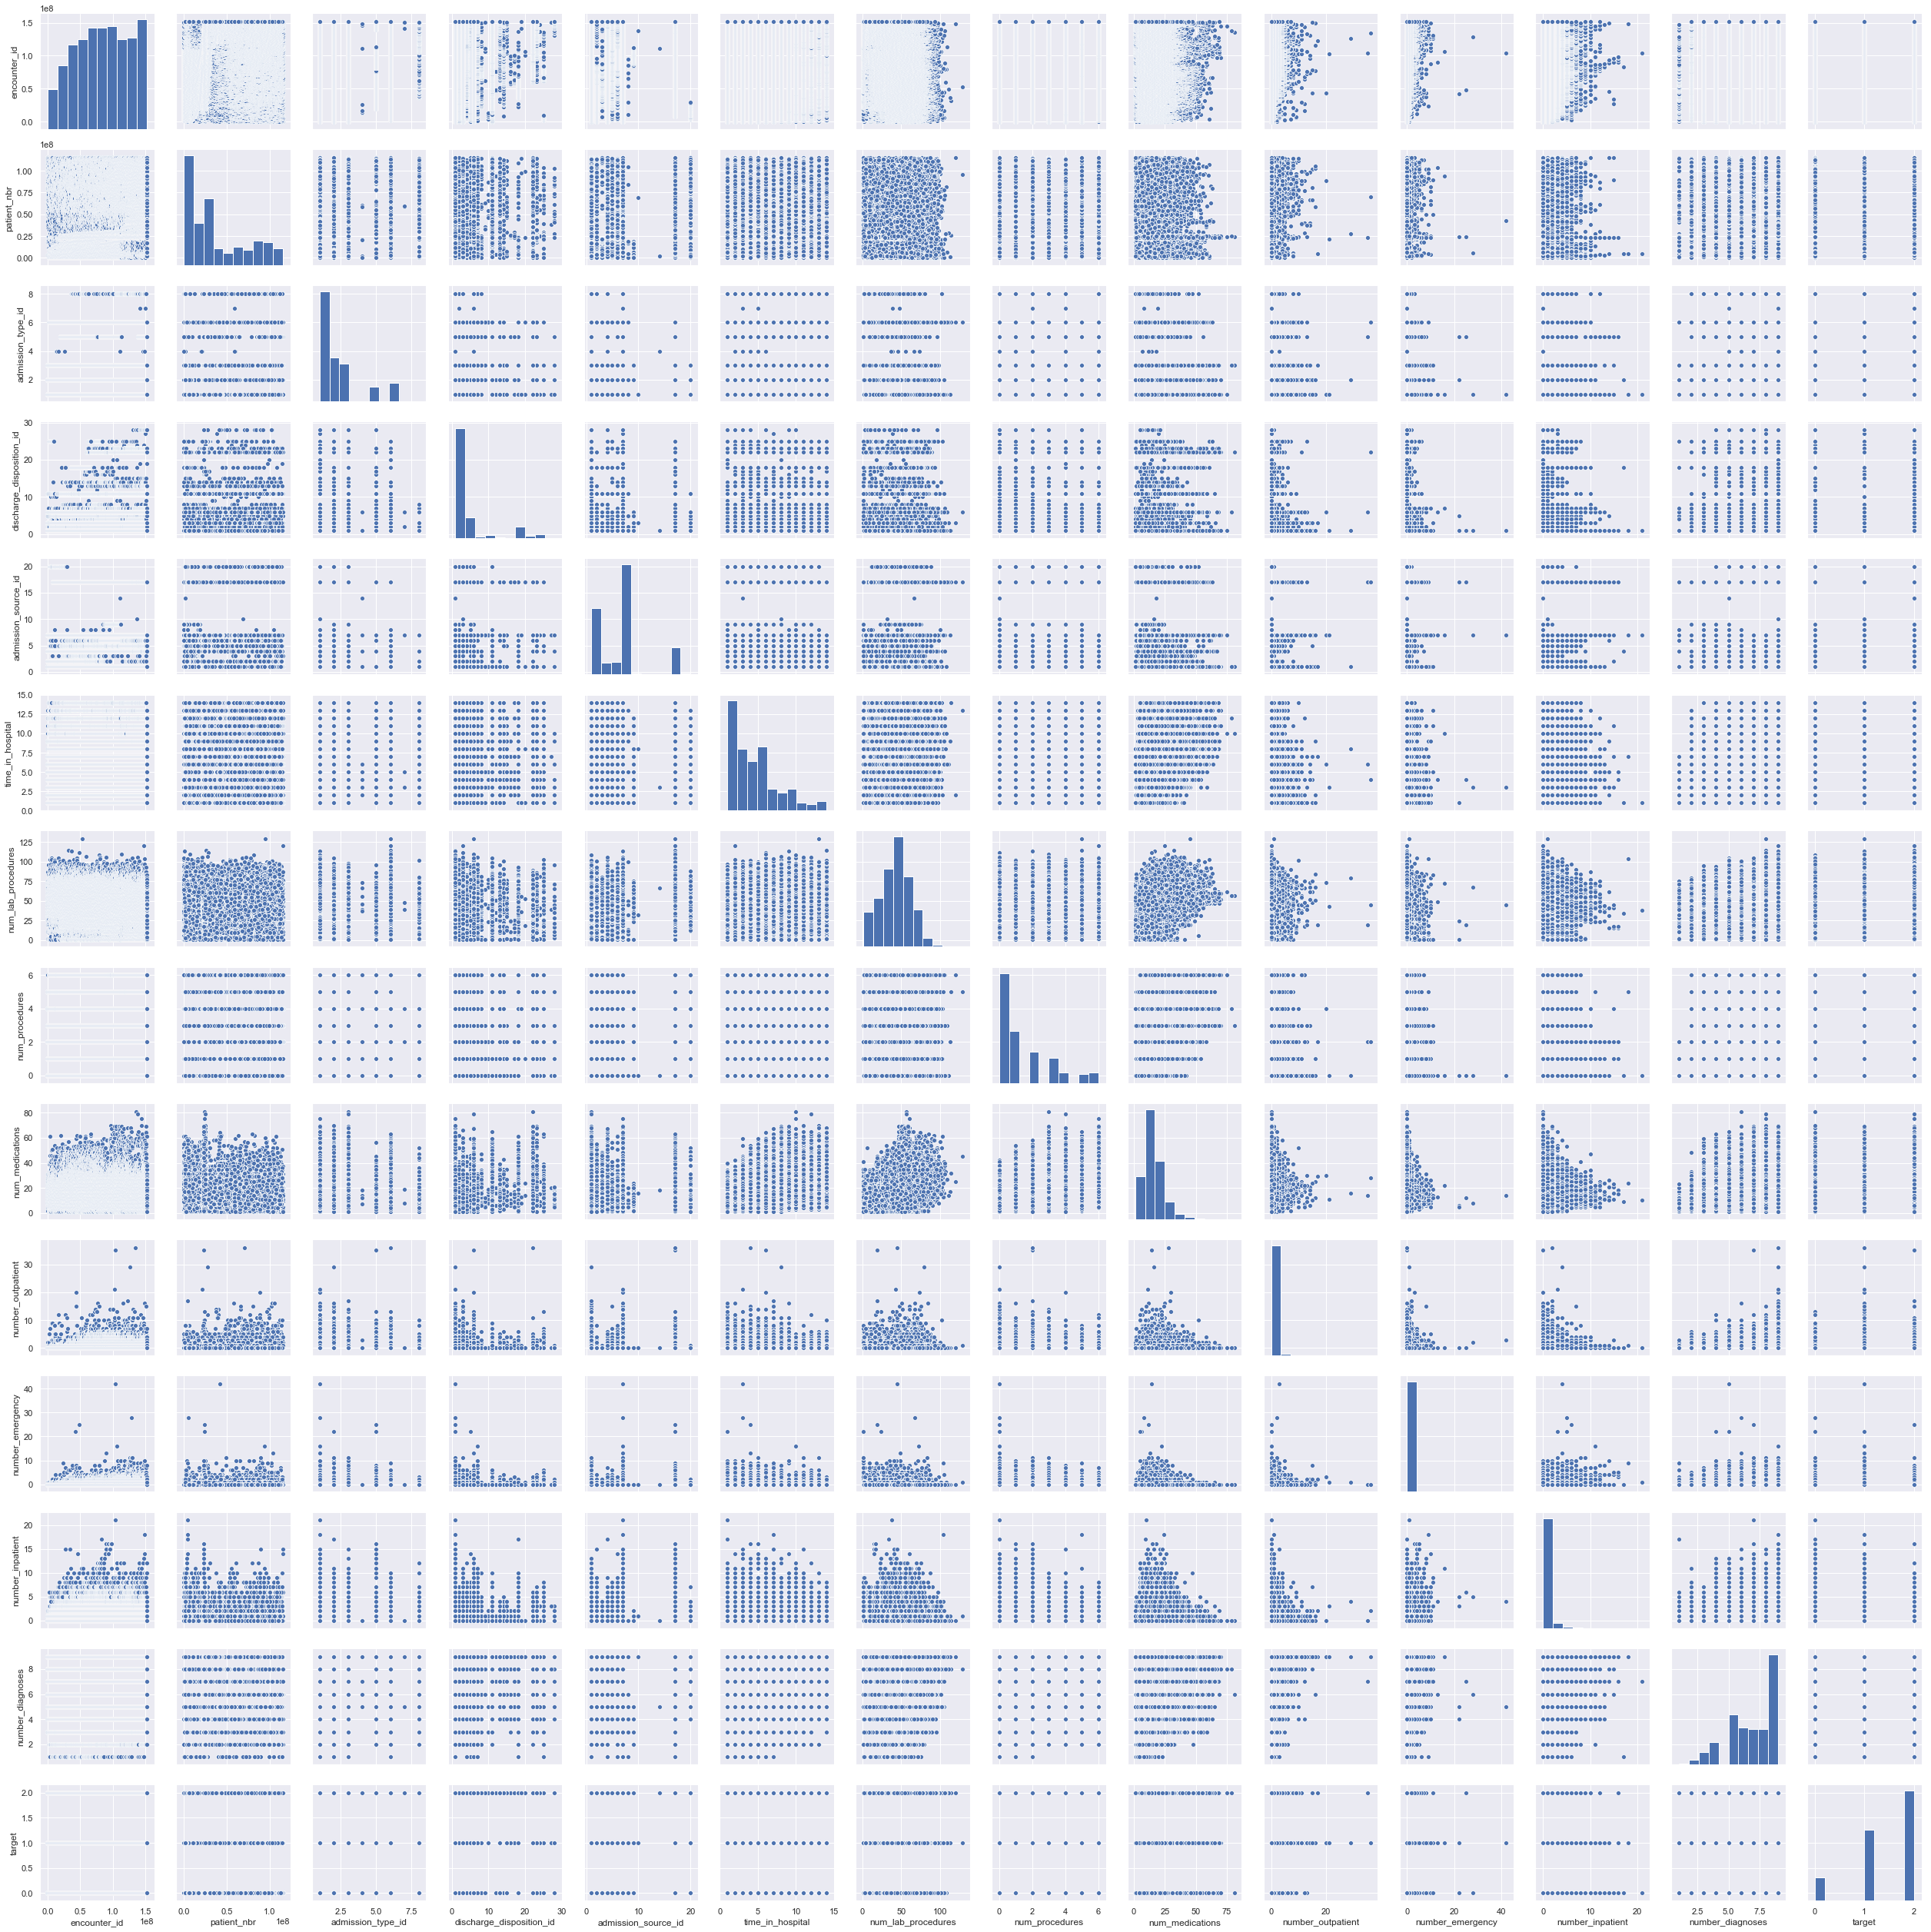

In [857]:
%%time
# this action can take about minute
sns.pairplot( X_train[features_numeric].assign(target=y_target.values) );

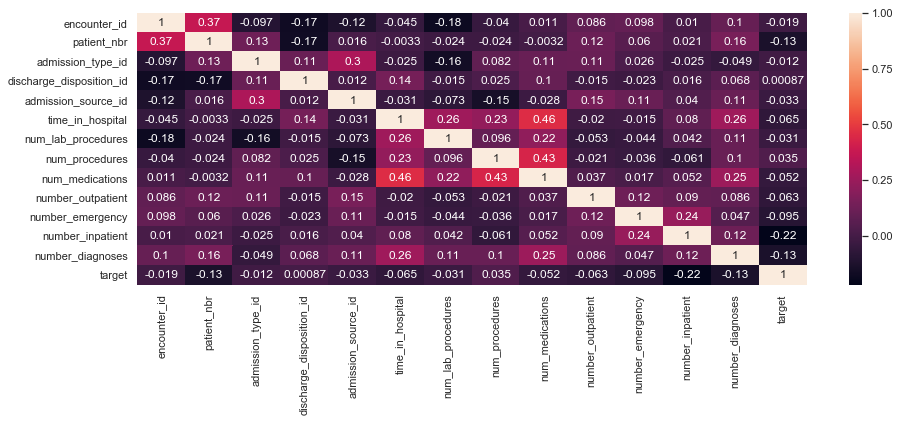

In [858]:
sns.heatmap(X_train[features_numeric].assign(target=y_target.values).corr(), annot=True);

#### 3.2.2. Categorical & Categorical

In [859]:
df = X_train_categorical[features_categorical].assign(target=y_train.values)
df.head()
#df.set_index('target').T.plot(kind='bar', stacked=True)
#df.plot(x='target',kind='bar', stacked=True)

,gender,age,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,glipizide,...,acarbose,insulin,glyburide-metformin,change,diabetesMed,race_mf,diag_1_mf,diag_2_mf,diag_3_mf,target
0,Female,[0-10),None,None,No,No,No,No,No,No,...,No,No,No,No,No,Caucasian,250.83,428,250,NO
1,Female,[10-20),None,None,No,No,No,No,No,No,...,No,Up,No,Ch,Yes,Caucasian,276,250.01,255,>30
2,Female,[20-30),None,None,No,No,No,No,No,Steady,...,No,No,No,No,Yes,AfricanAmerican,648,250,V27,NO
3,Male,[30-40),None,None,No,No,No,No,No,No,...,No,Up,No,Ch,Yes,Caucasian,8,250.43,403,NO
4,Male,[40-50),None,None,No,No,No,No,No,Steady,...,No,Steady,No,Ch,Yes,Caucasian,197,157,250,NO


In [24]:
%%time
chi_table_prob = pd.DataFrame(np.zeros((len(df.columns), len(df.columns))),index=df.columns, columns=df.columns)
chi_table_val =pd.DataFrame(np.zeros((len(df.columns), len(df.columns))),index=df.columns, columns=df.columns)
for col_ind, col in tqdm_notebook(enumerate(df.columns)):
    for row_ind, row in enumerate(df.columns):
        chi = chi2_contingency(pd.crosstab(df[row], df[col], margins = True))
        chi_table_prob.iloc[row_ind, col_ind] = chi[1]
        chi_table_val.iloc[row_ind, col_ind] = chi[0]
        pd.crosstab(df[row], df[col], margins = True)


Wall time: 1min 37s


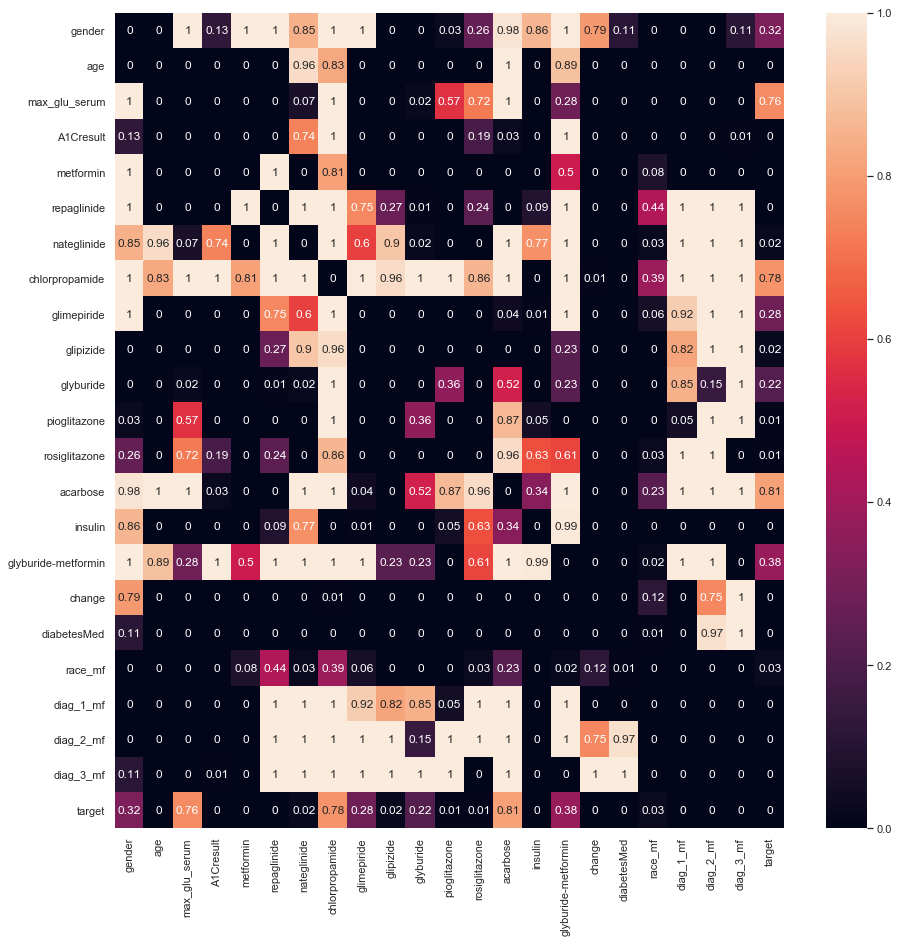

In [25]:
sns.set(rc={'figure.figsize':(15,15)})
sns.heatmap(chi_table_prob.round(2), annot=True);

This information shows dependencies between categorical features. There are also much stronger methods as Cramer V. It can be researched in further works.


#### 3.2.3. Numeric & Categorical

There are some test for exploring dependencies between numeric and categorical data, such Z-test or ANOVA test. But all of them has important assumptions that must be satisfied. One of them - Each data sample is from a normally distributed population. As a lot of our data are not from normally distribution, so we can't use it in this way. 
Maybe we can implement it if make some data modification transforming it to normal, but it is the plan for further research.

## Part 4. Patterns, insights, pecularities of data  <a class="anchor" id="part4"></a>

Let's sum up conclusions about data, based on previous parts.

Fields `encounter_id`, `patient_nbr` must be dropped, because it is just patient number, algorithms can overfit on them
There are a lot of missings in the fields `weight`, `payer_code`, `medical_specialty`. So we need to force it - use boosting (they can work with nans and '?'), drop them or fill them.

A lot of features disturbed non-normally. So 'classic' methods fill loose accuracy here. Good idea for further reserch - try to transform them to normal (maybe using log).

There are no any significant correlation between target and any of numeric features, but there are for some categorical. We need to choose categoricals carefully!

There are high correlations between some numeric/categorical features, so we can drop a lot of them with no loosing accuracy.

Need to pay special attention to `diag_` categories - they have a lot values, so using one-hot-encoding increase number of features greatly.

**This is a multiclass problem, so we need to choose suitable methods.
Good one can be KNN and trees.**


## Part 5. Dataset and features description <a class="anchor" id="part5"></a>

### 5.1. Prepare data for KNN method

#### Drop seatures we would not use for baseline

In [860]:
X_train_knn = X_train.drop(['encounter_id', 'patient_nbr', 'race', 'weight', 'payer_code', 'medical_specialty', 
                             'diag_1', 'diag_2', 'diag_3'], axis=1)
X_test_knn = X_test.drop(['encounter_id', 'patient_nbr', 'race', 'weight', 'payer_code', 'medical_specialty', 
                             'diag_1', 'diag_2', 'diag_3'], axis=1)

#### Convert string types to numeric: age, gender

In [861]:
X_train_knn['age_num'] = X_train_knn['age'].apply(lambda x: int(x[1]) )
X_train_knn.drop('age', axis=1, inplace=True)

X_test_knn['age_num'] = X_test_knn['age'].apply(lambda x: int(x[1]) )
X_test_knn.drop('age', axis=1, inplace=True)

In [862]:
# gender outlier:
#  we have 1 outlier here gender==Unknown/Invalid. 1 value is not important, 
# but for not to create additional dimension lets change it to Male, as his features a bit closer to Male mean than Female
X_train_knn.iloc[X_train_knn[X_train_knn['gender']=='Unknown/Invalid'].index, 0] = 'Male'
X_train_knn['gender_num'] = X_train_knn['gender'].apply(lambda x: 0 if x=='Male' else 1)
X_train_knn.drop('gender', axis=1, inplace=True)


In [863]:
X_test_knn.loc[X_test_knn.gender == 'Unknown/Invalid', 'gender'] = 'Male'
X_test_knn['gender_num'] = X_test_knn['gender'].apply(lambda x: 0 if x=='Male' else 1)
X_test_knn.drop('gender', axis=1, inplace=True)

In [864]:
X_train_knn_tmp = X_train_knn.iloc[:,0:11].assign(age_num=X_train_knn['age_num'], 
                                                  gender_num=X_train_knn['gender_num'])

X_test_knn =  X_test_knn.iloc[:,0:11].assign(age_num=X_test_knn['age_num'], 
                                                  gender_num=X_test_knn['gender_num'])


#### Select medical supplieses (medications) that affect accuracy

In [865]:
# list of features for adding them to X_train
medicals = X_train_knn.columns[11:25]
print(medicals)
medicals_list = []
for ind, med in enumerate(medicals):
    medicals_list.append( pd.get_dummies(X_train_knn[med], prefix=med) )
    
medicals_list_test = []
for ind, med in enumerate(medicals):
    medicals_list_test.append( pd.get_dummies(X_test[med], prefix=med) )

Index(['max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'insulin',
       'glyburide-metformin'],
      dtype='object')


First of all lets start from using numerical features + age and gender only.
Result accuracy for KNN - 0.48.

Finding optimal neibhoor value = 70 give us baseline - **accuracy 0.57**

Also lets test what if delete some of the numerical features - tried one by one, all them increasing accuracy **except gender!** So maybe we will drop this feature.
Also checked do we need to scale binary features - it doesn't affect results, as expected.
After than lets add features one by one, checking accuracy - does it incease or decrease it.

Using KNN on all features give worse result, so lets repeat adding categorial feature one by one.

**Not all result shown here because of rewriting code for every experiment and so as not to take a lot of space.**

Shown final results.

In [ ]:
%%time
# this cell takes 35 mins to find optimal set of medical supplies features

# medicals_optimal = [0,3,5,6,11,13]
# subsets = []
# for el in range(2, len(medicals_optimal)+1):
#     for subset in itertools.combinations(medicals_optimal, el):
#         subsets.append(subset)

# for subset in subsets:
#     print(subset)
#     X_train_knn_tmp_cat = X_train_knn_tmp
#     for el in subset:
#         X_train_knn_tmp_cat = pd.concat( [X_train_knn_tmp_cat, medicals_list[el]], axis=1)
#     print(X_train_knn_tmp_cat.columns)

#     scaler = StandardScaler()
#     X_train_knn_scaled = scaler.fit_transform(X_train_knn_tmp_cat.drop('gender_num', axis=1))

#     print(X_train_knn_scaled.shape)

#     X_tr, X_holdout, y_tr, y_holdout = train_test_split(X_train_knn_scaled, y_target, test_size=0.3,
#                                                         random_state=17)

#     n_neib = 70
#     neigh = KNeighborsClassifier(n_neighbors=n_neib)
#     neigh.fit(X_tr, y_tr) 
#     knn_pred = neigh.predict(X_holdout)
#     res = accuracy_score(y_holdout, knn_pred)
#     print(res)

In [31]:
# The optimal set of medical supplies:
medicals_optimal = [3,11,13]
for el in medicals_optimal:
    X_train_knn_tmp = pd.concat( [X_train_knn_tmp, medicals_list[el]], axis=1)
X_train_knn_tmp.columns

Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'age_num', 'gender_num',
       'repaglinide_Down', 'repaglinide_No', 'repaglinide_Steady',
       'repaglinide_Up', 'acarbose_No', 'acarbose_Steady', 'acarbose_Up',
       'glyburide-metformin_Down', 'glyburide-metformin_No',
       'glyburide-metformin_Steady', 'glyburide-metformin_Up'],
      dtype='object')

#### Check other features

Trying to use all of the diagnoses as dummy variables - bad idea. It took a lot of time for computation and give no effect - accuracy is lower than without diagnoses.
So the idea - use only top N most frequent diagnoses and set "Other" category for all the others. 

In [35]:
# For now we need to check all other categorical features:
non_medicals = ['race_mf', 'diag_1_mf', 'diag_2_mf', 'diag_3_mf', 'change', 'diabetesMed']
non_medicals_list = []
for ind, el in enumerate(non_medicals):
    non_medicals_list.append( pd.get_dummies(X_train_knn[el], prefix=el) )

In [52]:
top_diag1 = X_train_knn['diag_1_mf'].value_counts()[0:20]
top_diag1.index

Index(['414', '428', '786', '410', '486', '427', '434', '996', '682', '780',
       '276', '715', '491', 'V57', '250.8', '38', '599', '250.6', '584',
       '577'],
      dtype='object')

In [ ]:
# %%time

# This cell takes a lot of time again - it's just example how to test features with a lot of categories

# for num_feat in [125, 225]:
#     top_diag1 = X_train_knn['diag_1_mf'].value_counts()[0:num_feat]
#     dum = X_train_knn['diag_1_mf'].apply(lambda x: x if x in top_diag1.index else 'other')
#     dum = pd.get_dummies(dum, prefix='diag_1') 
#     X_train_knn_tmp_cat = pd.concat( [X_train_knn_tmp, dum], axis=1)
#     print(X_train_knn_tmp_cat.columns)

#     scaler = StandardScaler()
#     X_train_knn_scaled = scaler.fit_transform(X_train_knn_tmp_cat.drop('gender_num', axis=1))

#     print(X_train_knn_scaled.shape)

#     X_tr, X_holdout, y_tr, y_holdout = train_test_split(X_train_knn_scaled, y_target, test_size=0.3,
#                                                         random_state=17)

#     n_neib = 70
#     neigh = KNeighborsClassifier(n_neighbors=n_neib)
#     neigh.fit(X_tr, y_tr) 
#     knn_pred = neigh.predict(X_holdout)
#     res = accuracy_score(y_holdout, knn_pred)
#     print(res)

#### Conlusion

Looks like KNN is not really good for this task. We have a lot of categorical features, some of the with really big number of categories. This creates data of big dimentionality. As we think that some features still can be helpful KNN loose accuracy on them.

The best achived result for KNN: **accuracy = 0.575**

Lets try another algorithm whichis good with categorical features and good with big dimention data.
I suppose to use some boosting and start from **CatBoost**.

Optimal solution:

In [866]:
%%time
medicals_optimal = [3,11,13]
for el in medicals_optimal:
    X_train_knn_tmp = pd.concat( [X_train_knn_tmp, medicals_list[el]], axis=1)
    
print(X_train_knn_tmp.columns)
print(X_train_knn_tmp.shape)

scaler = StandardScaler()
X_train_knn_scaled = scaler.fit_transform(X_train_knn_tmp.drop('gender_num', axis=1))

X_tr_knn, X_holdout_knn, y_tr, y_holdout = train_test_split(X_train_knn_scaled, y_target, test_size=0.3,
                                                    random_state=17)

n_neib = 70
neigh = KNeighborsClassifier(n_neighbors=n_neib)
neigh.fit(X_tr_knn, y_tr) 
knn_pred = neigh.predict(X_holdout_knn)
res_knn = accuracy_score(y_holdout, knn_pred)
print(res_knn)

Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'age_num', 'gender_num',
       'repaglinide_Down', 'repaglinide_No', 'repaglinide_Steady',
       'repaglinide_Up', 'acarbose_No', 'acarbose_Steady', 'acarbose_Up',
       'glyburide-metformin_Down', 'glyburide-metformin_No',
       'glyburide-metformin_Steady', 'glyburide-metformin_Up'],
      dtype='object')
(50883, 24)


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


0.5750409433344251
Wall time: 22.5 s


In [867]:
# Prepare test data for final check
medicals_optimal = [3,11,13]
for el in medicals_optimal:
    X_test_knn = pd.concat( [X_test_knn, medicals_list_test[el]], axis=1)
X_test_knn = scaler.transform(X_test_knn.drop('gender_num', axis=1))

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  """


In [818]:
# # Use for CV
# res_knn_cv = []

# kf = KFold(n_splits = 5, random_state = 17, shuffle = True)
# for i, (train_index, test_index) in enumerate(kf.split(X_train_knn_scaled)):
    
#     # Create data for this fold
#     y_train_knn_cv, y_valid_knn_cv = y_target.iloc[train_index], y_target.iloc[test_index]
#     X_train_knn_cv, X_valid_knn_cv = X_train_knn_scaled[train_index,:], X_train_knn_scaled[test_index,:]
#     print( "\nFold ", i)
    
#     # Run model for this fold
#     neigh.fit(X_train_knn_cv, y_train_knn_cv) 
#     pred = neigh.predict(X_valid_knn_cv)
#     res_knn_cv.append(accuracy_score(pred,y_valid_knn_cv))    


Fold  0

Fold  1

Fold  2

Fold  3

Fold  4


In [821]:
# np.mean(res_knn_cv)

0.5714679612679473

### 5.2. Prepare data for CatBoost method

In [720]:
from catboost import CatBoostClassifier, Pool, cv


Feature importance show features that can be dropped without loss of accuracy.

In [868]:
# initialize data
X_train_catboost = X_train.drop(['race', 'diag_1', 'diag_2', 'diag_3', 'encounter_id', 'patient_nbr', 'change',
                                'glyburide-metformin', 'acarbose', 'chlorpropamide',
                                'pioglitazone', 'rosiglitazone', 'nateglinide', 'glyburide',
                                'metformin', 'diag_3_mf', 'A1Cresult', 'gender',
                                'admission_type_id', 'num_medications', 'insulin',
                                'admission_source_id', 'num_procedures', 'weight'], axis=1)
X_test_catboost = X_test.drop(['race', 'diag_1', 'diag_2', 'diag_3','encounter_id', 'patient_nbr', 'change',
                              'glyburide-metformin', 'acarbose', 'chlorpropamide',
                              'pioglitazone', 'rosiglitazone', 'nateglinide', 'glyburide',
                              'metformin', 'diag_3_mf', 'A1Cresult', 'gender',
                              'admission_type_id', 'num_medications', 'insulin',
                              'admission_source_id', 'num_procedures', 'weight'], axis=1)


X_tr_catboost, X_holdout_catboost, y_tr, y_holdout = train_test_split(X_train_catboost, y_target, test_size=0.3,
                                                        random_state=17)


# save indeces of categorical data
cat_features_catboost = []
for ind, el in enumerate(X_tr_catboost.columns):
    if el in X_tr_catboost.select_dtypes(include='object').columns:
        cat_features_catboost.append(ind)


In [782]:
model = CatBoostClassifier(iterations=50, depth=6, learning_rate=0.9, loss_function='MultiClass', 
                           verbose=10, random_seed=17, custom_loss='Accuracy')

#train the model
train_pool = Pool(X_tr_catboost, y_tr, cat_features=cat_features_catboost)
model.fit(train_pool)

# make the prediction using the resulting model
catboost_pred = model.predict(X_holdout_catboost)
# preds_proba = model.predict_proba(X_holdout)
res = accuracy_score(y_holdout, catboost_pred)
print(res)

In [800]:
# # Use for CV
# params = {'iterations':50,
#           'depth':6,
#           'learning_rate':0.9,
#           'loss_function':'MultiClass',
#           'random_seed':17}

# res_catboost_cv = []

# kf = KFold(n_splits = 5, random_state = 17, shuffle = True)
# for i, (train_index, test_index) in enumerate(kf.split(X_train_catboost)):
    
#     # Create data for this fold
#     y_train_cb_cv, y_valid_cb_cv = y_target.iloc[train_index], y_target.iloc[test_index]
#     X_train_cb_cv, X_valid_cb_cv = X_train_catboost.iloc[train_index,:], X_train_catboost.iloc[test_index,:]
#     print( "\nFold ", i)
    
#     # Run model for this fold
#     fit_model = model.fit( X_train_cb_cv, y_train_cb_cv, 
#                            cat_features=cat_features_catboost
#                          )
        
#     # Generate validation predictions for this fold
#     pred_cb_cv = fit_model.predict(X_valid_cb_cv)
#     res_catboost_cv.append(accuracy_score(pred_cb_cv,y_valid_cb_cv))    


Fold  0
0:	learn: -0.9379463	total: 103ms	remaining: 5.05s
10:	learn: -0.8735707	total: 1.98s	remaining: 7s
20:	learn: -0.8613177	total: 3.94s	remaining: 5.44s
30:	learn: -0.8544771	total: 6.08s	remaining: 3.72s
40:	learn: -0.8485076	total: 8.26s	remaining: 1.81s
49:	learn: -0.8441820	total: 10.3s	remaining: 0us

Fold  1
0:	learn: -0.9385288	total: 109ms	remaining: 5.35s
10:	learn: -0.8758877	total: 2.05s	remaining: 7.27s
20:	learn: -0.8631303	total: 4.16s	remaining: 5.75s
30:	learn: -0.8566452	total: 6.68s	remaining: 4.1s
40:	learn: -0.8500370	total: 9.1s	remaining: 2s
49:	learn: -0.8464853	total: 11.3s	remaining: 0us

Fold  2
0:	learn: -0.9377738	total: 112ms	remaining: 5.48s
10:	learn: -0.8793085	total: 1.84s	remaining: 6.53s
20:	learn: -0.8650852	total: 4s	remaining: 5.53s
30:	learn: -0.8575198	total: 6.29s	remaining: 3.85s
40:	learn: -0.8523371	total: 8.72s	remaining: 1.92s
49:	learn: -0.8483403	total: 10.7s	remaining: 0us

Fold  3
0:	learn: -0.9249876	total: 205ms	remaining: 10s

In [803]:
#np.mean(res_catboost_cv)

0.5885660715709303

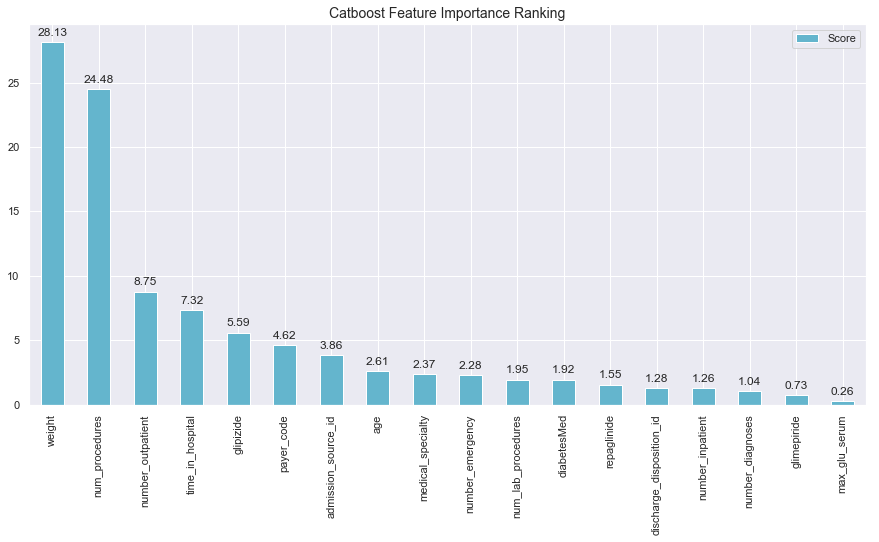

In [664]:
# Feature importance for CatBoost

def plot_feature_importances_catboost(data : pd.DataFrame, model, train_pool):
    feature_scores = pd.DataFrame(list(zip(data.dtypes.index, model.get_feature_importance(train_pool))),
                                  columns=['Feature','Score'])
    feature_scores = feature_scores.sort_values(by='Score', ascending=False)

    plt.rcParams["figure.figsize"] = (15,7)
    ax = feature_scores.plot('Feature', 'Score', kind='bar', color='c')
    ax.set_title("Catboost Feature Importance Ranking", fontsize = 14)
    ax.set_xlabel('')

    rects = ax.patches

    # get feature score as labels round to 2 decimal
    labels = feature_scores['Score'].round(2)

    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height + 0.35, label, ha='center', va='bottom')

    plt.show()
    
plot_feature_importances_catboost(X_tr_catboost, model, train_pool)

In [133]:
conf_matrix = pd.DataFrame({'true':y_holdout.values, 'pred':catboost_pred.flatten()})

pd.crosstab(conf_matrix['true'], conf_matrix['pred'])

pred,0.0,1.0,2.0
true,,,
0,55,718,987
1,74,2265,2993
2,40,1447,6686


array([[ 2.32550965,  3.44375304, -1.10917491, ...,  0.06057108,
        -0.05874634, -0.00991334],
       [-0.7577709 , -0.54313739,  0.14625226, ...,  0.06057108,
        -0.05874634, -0.00991334],
       [-0.7577709 , -0.54313739,  0.14625226, ...,  0.06057108,
        -0.05874634, -0.00991334],
       ...,
       [ 0.47554132, -0.54313739, -1.10917491, ...,  0.06057108,
        -0.05874634, -0.00991334],
       [ 0.47554132, -0.54313739, -1.10917491, ...,  0.06057108,
        -0.05874634, -0.00991334],
       [ 0.47554132, -0.54313739, -1.10917491, ...,  0.06057108,
        -0.05874634, -0.00991334]])

### 5.3. Prepare data for LightGBM method

In [887]:
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder

X_train_lgb = pd.DataFrame.copy(X_train)
X_train_lgb.select_dtypes(include='object').columns

X_train_lgb = X_train_lgb.drop(['race', 'diag_1', 'diag_2', 'diag_3', 'encounter_id', 'patient_nbr', 'change',
                                'glyburide-metformin', 'acarbose', 'chlorpropamide',
                                'pioglitazone', 'rosiglitazone', 'nateglinide', 'glyburide',
                                'metformin', 'diag_3_mf', 'A1Cresult', 'gender',
                                'admission_type_id', 'num_medications', 'insulin'], axis=1)
X_test_lgb = X_test.drop(['race', 'diag_1', 'diag_2', 'diag_3', 'encounter_id', 'patient_nbr', 'change',
                                'glyburide-metformin', 'acarbose', 'chlorpropamide',
                                'pioglitazone', 'rosiglitazone', 'nateglinide', 'glyburide',
                                'metformin', 'diag_3_mf', 'A1Cresult', 'gender',
                                'admission_type_id', 'num_medications', 'insulin'], axis=1)

In [888]:
encoder = LabelEncoder()
cat_features_lgb = []
for ind, el in enumerate(X_train_lgb.columns):
    if el in X_train_lgb.select_dtypes(include='object').columns:
        cat_features_lgb.append(el)


for el in cat_features_lgb:
    encoder = encoder.fit(X_train_lgb[el])
    X_train_lgb[el] = encoder.transform(X_train_lgb[el])


X_tr_lgb, X_holdout_lgb, y_tr, y_holdout = train_test_split(X_train_lgb, y_target, test_size=0.3,
                                                        random_state=17)
    
for ind, el in enumerate(X_tr_lgb.columns):
    if el in X_tr_lgb.select_dtypes(include='object').columns:
        X_tr_lgb[el] = X_tr_lgb[el].astype('category')
        X_holdout_lgb[el] = X_holdout_lgb[el].astype('category')

In [889]:
param = {'objective': 'multiclass',
         'num_class': 3,
         'num_leaves':20,
         'num_trees':200,
         'metric': ['multi_error']}

lgb_train = lgb.Dataset(X_tr_lgb, label=y_tr)
lgb_val = lgb.Dataset(X_holdout_lgb, label=y_holdout, reference=lgb_train)


# model = lgb.train(params, lgb_train,
#                   valid_sets=[lgb_val], 
#                   verbose_eval=True)
lgb_model = lgb.train(param, lgb_train, 10000, valid_sets=[lgb_train], verbose_eval=20)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[20]	training's multi_error: 0.408529
[40]	training's multi_error: 0.398703
[60]	training's multi_error: 0.389157
[80]	training's multi_error: 0.382419
[100]	training's multi_error: 0.37773
[120]	training's multi_error: 0.373519
[140]	training's multi_error: 0.368325
[160]	training's multi_error: 0.36417
[180]	training's multi_error: 0.360716
[200]	training's multi_error: 0.356252


In [890]:
lgb_pred = lgb_model.predict(X_holdout)
lgb_pred = np.argmax(lgb_pred,axis=1)
accuracy_score(y_holdout, lgb_pred)

0.5910252210940059

In [814]:
# # Used for CV
# for ind, el in enumerate(X_train_lgb.columns):
#     if el in X_train_lgb.select_dtypes(include='object').columns:
#         X_train_lgb[el] = X_train_lgb[el].astype('category')

# lgb_cv = lgb.Dataset(X_train_lgb, label=y_tr)
# # Use for CV

# res_lgb_cv = []

# kf = KFold(n_splits = 5, random_state = 17, shuffle = True)
# for i, (train_index, test_index) in enumerate(kf.split(X_train_lgb)):
    
#     # Create data for this fold
#     y_train_lgb_cv, y_valid_lgb_cv = y_target.iloc[train_index], y_target.iloc[test_index]
#     X_train_lgb_cv, X_valid_lgb_cv = X_train_lgb.iloc[train_index,:], X_train_lgb.iloc[test_index,:]
#     print( "\nFold ", i)
#     lgb_cv = lgb.Dataset(X_train_lgb_cv, label=y_train_lgb_cv)
#     lgb_cv_val = lgb.Dataset(X_valid_lgb_cv, label=y_valid_lgb_cv)
#     # Run model for this fold
#     fit_model = None
#     fit_model = lgb.train(param, lgb_cv, valid_sets=[lgb_cv_val], verbose_eval=20)
        
#     # Generate validation predictions for this fold
#     pred_lgb_cv = fit_model.predict(X_valid_lgb_cv)
#     pred_lgb_cv = np.argmax(pred,axis=1)
#     res_lgb_cv.append(accuracy_score(pred,y_valid_lgb_cv))    


Fold  0


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[20]	valid_0's multi_error: 0.416626
[40]	valid_0's multi_error: 0.414661
[60]	valid_0's multi_error: 0.412007
[80]	valid_0's multi_error: 0.413678
[100]	valid_0's multi_error: 0.414169
[120]	valid_0's multi_error: 0.412106
[140]	valid_0's multi_error: 0.41132
[160]	valid_0's multi_error: 0.411123
[180]	valid_0's multi_error: 0.41132
[200]	valid_0's multi_error: 0.411909

Fold  1


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[20]	valid_0's multi_error: 0.42596
[40]	valid_0's multi_error: 0.418689
[60]	valid_0's multi_error: 0.412401
[80]	valid_0's multi_error: 0.410239
[100]	valid_0's multi_error: 0.410141
[120]	valid_0's multi_error: 0.407586
[140]	valid_0's multi_error: 0.406898
[160]	valid_0's multi_error: 0.407684
[180]	valid_0's multi_error: 0.407291
[200]	valid_0's multi_error: 0.407094

Fold  2


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[20]	valid_0's multi_error: 0.414661
[40]	valid_0's multi_error: 0.408372
[60]	valid_0's multi_error: 0.405817
[80]	valid_0's multi_error: 0.405227
[100]	valid_0's multi_error: 0.403557
[120]	valid_0's multi_error: 0.404147
[140]	valid_0's multi_error: 0.403066
[160]	valid_0's multi_error: 0.404245
[180]	valid_0's multi_error: 0.404638
[200]	valid_0's multi_error: 0.405031

Fold  3


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[20]	valid_0's multi_error: 0.413424
[40]	valid_0's multi_error: 0.406545
[60]	valid_0's multi_error: 0.404776
[80]	valid_0's multi_error: 0.402614
[100]	valid_0's multi_error: 0.402123
[120]	valid_0's multi_error: 0.401238
[140]	valid_0's multi_error: 0.401336
[160]	valid_0's multi_error: 0.40173
[180]	valid_0's multi_error: 0.402811
[200]	valid_0's multi_error: 0.401533

Fold  4


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[20]	valid_0's multi_error: 0.406152
[40]	valid_0's multi_error: 0.403498
[60]	valid_0's multi_error: 0.399273
[80]	valid_0's multi_error: 0.397307
[100]	valid_0's multi_error: 0.396521
[120]	valid_0's multi_error: 0.395244
[140]	valid_0's multi_error: 0.39318
[160]	valid_0's multi_error: 0.391903
[180]	valid_0's multi_error: 0.392099
[200]	valid_0's multi_error: 0.394163


In [816]:
# np.mean(res_lgb_cv)

0.5960539314974016

In [891]:
# Prepare test data for final check

for el in cat_features_lgb:
    encoder = encoder.fit(X_test_lgb[el])
    X_test_lgb[el] = encoder.transform(X_test_lgb[el])

for ind, el in enumerate(X_test_lgb.columns):
    if el in X_test_lgb.select_dtypes(include='object').columns:
        X_test_lgb[el] = X_test_lgb[el].astype('category')

## Part 6. Feature engineering and description <a class="anchor" id="part6"></a>

It looks like we find some optimization minimum - all three algorithms gave same result (0.57-0.60).
So as adding/deleting features and tuning hyperparameters give no positive effect, let's try to create new features.

Some simple way for it - create some useful combinations of the existing features.


P.S. There are no code for every usage of new generated features - just results (as to make project more readable).

First idea - as we drop a lot of medications features, lets create sum of them - how many of them patient used.
Also we can try create binary features - did he used this mediacation (just 0 or 1) - Perhaps some drugs are prescribed at various stages of diabetes.

In [604]:
# Summary od medicals
medicals = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'insulin', 'glyburide-metformin']
X_med = pd.DataFrame()
for el in medicals:
    X_med[el+'_usage'] = X_train[el].map({'No':0, 'Steady':1, 'Up':1, 'Down':1})

X_med['med_sum'] = X_med.sum(axis=1)

Second idea is more brut force. lets create different polynomial features from ours. We didn't find linear dependencies but it can be non-linear. Polynomial features can help us chech this hypothesis.

In [116]:
# Creating polynomial features
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
features_numeric[2:]
X_poly = pd.DataFrame(poly.fit_transform(X_train[features_numeric[2:]]))

In [610]:
X_poly_best = X_poly[[23, 48]]

Third idea - let's try change feature distribution. Using log can reduce it skewness.

In [622]:
X_log = X_train[features_numeric].drop(['encounter_id', 'patient_nbr'], axis=1).applymap(lambda x: np.log(x+1))

#### Checking CatBoost

In [632]:
# initialize data

X_train_catboost = X_train.drop(['race', 'diag_1', 'diag_2', 'diag_3', 'encounter_id', 'patient_nbr', 'change',
                                'glyburide-metformin', 'acarbose', 'chlorpropamide',
                                'pioglitazone', 'rosiglitazone', 'nateglinide', 'glyburide',
                                'metformin', 'diag_3_mf', 'A1Cresult', 'gender',
                                'admission_type_id', 'num_medications', 'insulin'], axis=1)
X_train_catboost = pd.concat([X_train_catboost, X_log], axis=1)

X_test_catboost = X_test.drop(['race', 'diag_1', 'diag_2', 'diag_3','encounter_id', 'patient_nbr'], axis=1)
# TODO: add the same action for test

X_tr, X_holdout, y_tr, y_holdout = train_test_split(X_train_catboost, y_target, test_size=0.3,
                                                        random_state=17)


# save indeces of categorical data
X_tr.select_dtypes(include='object').columns
cat_features_catboost = []
for ind, el in enumerate(X_tr.columns):
    if el in X_tr.select_dtypes(include='object').columns:
        cat_features_catboost.append(ind)
X_train_catboost.columns

Index(['age', 'weight', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses',
       'max_glu_serum', 'repaglinide', 'glimepiride', 'glipizide',
       'diabetesMed', 'race_mf', 'diag_1_mf', 'diag_2_mf', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses'],
      dtype='object')

In [633]:
model_catboost = CatBoostClassifier(iterations=50, depth=6, learning_rate=0.9, loss_function='MultiClass', 
                           verbose=10, random_seed=17, custom_loss='Accuracy')

#train the model
train_pool = Pool(X_tr, y_tr, cat_features=cat_features_catboost)
model_catboost.fit(train_pool)

# make the prediction using the resulting model
catboost_pred = model_catboost.predict(X_holdout)
# preds_proba = model.predict_proba(X_holdout)
res = accuracy_score(y_holdout, catboost_pred)
print(res)
#print("proba = ", preds_proba)

0:	learn: -0.9208446	total: 205ms	remaining: 10s
10:	learn: -0.8739201	total: 2.11s	remaining: 7.5s
20:	learn: -0.8555113	total: 4.35s	remaining: 6s
30:	learn: -0.8473731	total: 6.68s	remaining: 4.09s
40:	learn: -0.8405714	total: 9.04s	remaining: 1.98s
49:	learn: -0.8362673	total: 11.2s	remaining: 0us
0.5883393383557157


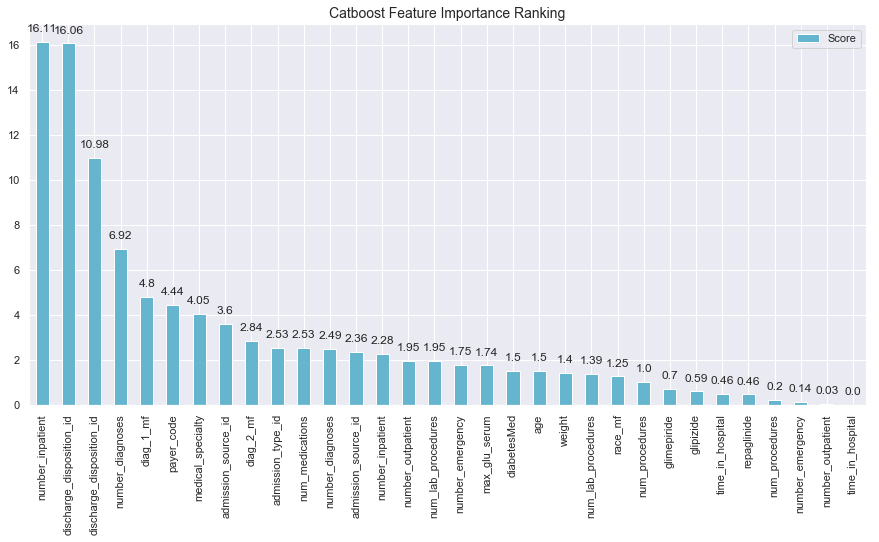

In [634]:
plot_feature_importances_catboost(X_tr, model_catboost, train_pool)

#### Checking LightGBM

In [651]:
X_train_lgb = pd.DataFrame.copy(X_train)
X_train_lgb.select_dtypes(include='object').columns

X_train_lgb = X_train_lgb.drop(['race', 'diag_1', 'diag_2', 'diag_3', 'encounter_id', 'patient_nbr', 'change',
                                'glyburide-metformin', 'acarbose', 'chlorpropamide',
                                'pioglitazone', 'rosiglitazone', 'nateglinide', 'glyburide',
                                'metformin', 'diag_3_mf', 'A1Cresult', 'gender',
                                'admission_type_id', 'num_medications', 'insulin'], axis=1)
X_test_lgb = X_test.drop(['race', 'diag_1', 'diag_2', 'diag_3', 'encounter_id', 'patient_nbr', 'change',
                                'glyburide-metformin', 'acarbose', 'chlorpropamide',
                                'pioglitazone', 'rosiglitazone', 'nateglinide', 'glyburide',
                                'metformin', 'diag_3_mf', 'A1Cresult', 'gender',
                                'admission_type_id', 'num_medications', 'insulin'], axis=1)

X_train_lgb = pd.concat([X_train_lgb, X_log], axis=1)

In [652]:
encoder = LabelEncoder()
cat_features_lgb = []
for ind, el in enumerate(X_train_lgb.columns):
    if el in X_train_lgb.select_dtypes(include='object').columns:
        cat_features_lgb.append(el)


for el in cat_features_lgb:
    encoder = encoder.fit(X_train_lgb[el])
    X_train_lgb[el] = encoder.transform(X_train_lgb[el])


X_tr, X_holdout, y_tr, y_holdout = train_test_split(X_train_lgb, y_target, test_size=0.3,
                                                        random_state=17)
    
# save indeces of categorical data
X_tr.select_dtypes(include='object').columns

for ind, el in enumerate(X_tr.columns):
    if el in X_tr.select_dtypes(include='object').columns:
        X_tr[el] = X_tr[el].astype('category')
        X_holdout[el] = X_holdout[el].astype('category')

In [653]:
param = {'objective': 'multiclass',
         'num_class': 3,
         'num_leaves':20,
         'num_trees':200,
         'metric': ['multi_error']}
lgb_train = lgb.Dataset(X_tr, label=y_tr)
lgb_val = lgb.Dataset(X_holdout, label=y_holdout, reference=lgb_train)

lgb_model = lgb.train(param, lgb_train, 1000, valid_sets=[lgb_train], verbose_eval=20)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[20]	training's multi_error: 0.404093
[40]	training's multi_error: 0.395137
[60]	training's multi_error: 0.386799
[80]	training's multi_error: 0.381464
[100]	training's multi_error: 0.376018
[120]	training's multi_error: 0.369813
[140]	training's multi_error: 0.364703
[160]	training's multi_error: 0.36038
[180]	training's multi_error: 0.355663
[200]	training's multi_error: 0.351592


In [654]:
lgb_pred = lgb_model.predict(X_holdout)
lgb_pred = np.argmax(lgb_pred,axis=1)
accuracy_score(y_holdout, lgb_pred)

0.5903046184081232

### Conclusion
So all attempts to find useful features not really succeed. This may be for two reasons:
1. Need to try more approaches, For example, groupby categorical features and encode with some numeric characteristic for this group. This let to drop categorical and use numeric instead.
2. Data is too poor, and it's really difficult to increase accuracy without using additional data.

## Part 7. Cross-validation, hyperparameter tuning <a class="anchor" id="part7"></a>

As we already did hyperparameter tuning at previuos stages (cv also), let's try blending now. We will use probabilities of CatBoost and LightGBM. The idea of this action - if one of the algorithms predicts wrong on some data sample another maybe not! So if we take mean (or anothe proportion) of answers we increase probability of right answer.

In [706]:
%%time
preds_proba_catboost = model.predict_proba(X_holdout_catboost)
lgb_pred = lgb_model.predict(X_holdout_lgb)
pred_knn = neigh.predict(X_holdout_knn)
pred_knn_dummy = pd.get_dummies(pred_knn).values

Wall time: 23.5 s


In [717]:
best_a = 0
best_b = 0
best_c = 0
best_acc = 0
for c in tqdm_notebook(range(0,100,5)):
    for a in range(0,101):
        for b in range(0,101):
            blended_proba = (a/100*preds_proba_catboost + b/100*lgb_pred + c/100*pred_knn_dummy) / 3

            blend_pred = np.argmax(blended_proba,axis=1)
            acc = accuracy_score(y_holdout, blend_pred)
            if acc > best_acc:
                best_a = a
                best_b = b
                best_acc = acc
                best_c = c
print(best_a, best_b, best_c, best_acc)


47 82 0 0.5960039305601048


This means using knn doesn't improve results. So lets check one more time using only CatBoost and LGBM

In [718]:
best_a = 0
best_acc = 0
for a in range(0,101):
    blended_proba = (a/100*preds_proba_catboost + (100-a)/100*lgb_pred) / 2
    blend_pred = np.argmax(blended_proba,axis=1)
    acc = accuracy_score(y_holdout, blend_pred)
    if acc > best_acc:
        best_a = a
        best_b = b
        best_acc = acc
        best_c = c
print(best_a, best_acc)

31 0.5956108745496234


So the best parameters are:

**prediction = (0.47\*CatBoost + 0.82\*LGB + c\*KNN) / 3**

But it's a bit strange, because we can get probability more than 1.0 (the algorithm is absolutely confident in its decision :) )

So let's use it without such hack.

**prediction = (0.31\*CatBoost + 0.69\*LGB) / 2**

In [882]:
# # Use for CV
# res_blend_cv = []


# kf = KFold(n_splits = 5, random_state = 17, shuffle = True)
# for i, (train_index, test_index) in enumerate(kf.split(X_train)):
    
#     # Create data for this fold
#     y_train_bl, y_valid_bl = y_target.iloc[train_index], y_target.iloc[test_index]
#     X_train_cb, X_valid_cb = X_train_catboost.iloc[train_index,:], X_train_catboost.iloc[test_index,:]
#     X_train_bl_cv, X_valid_bl_cv = X_train_lgb.iloc[train_index,:], X_train_lgb.iloc[test_index,:]
    
#     lgb_cv = lgb.Dataset(X_train_bl_cv, label=y_train_bl)
#     lgb_cv_val = lgb.Dataset(X_valid_bl_cv, label=y_valid_bl)
#     print( "\nFold ", i)
    

#     fit_model_cb = model.fit( X_train_cb, y_train_bl, 
#                            cat_features=cat_features_catboost
#                          )
#     fit_model_lgb = lgb.train(param, lgb_cv, valid_sets=[lgb_cv_val], verbose_eval=20)
        
#     # Generate validation predictions for this fold
#     pred_cb = fit_model_cb.predict_proba(X_valid_cb)
#     pred_lgb = fit_model_lgb.predict(X_valid_bl_cv)
    
#     res_blend_cv.append(accuracy_score(np.argmax(0.31*pred_cb + 0.69*pred_lgb ,axis=1),y_valid_bl))



Fold  0
0:	learn: -0.9379463	total: 101ms	remaining: 4.95s
10:	learn: -0.8735707	total: 1.99s	remaining: 7.05s
20:	learn: -0.8613177	total: 3.97s	remaining: 5.48s
30:	learn: -0.8544771	total: 6.13s	remaining: 3.76s
40:	learn: -0.8485076	total: 8.31s	remaining: 1.82s
49:	learn: -0.8441820	total: 10.3s	remaining: 0us


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[20]	valid_0's multi_error: 0.416626
[40]	valid_0's multi_error: 0.414661
[60]	valid_0's multi_error: 0.412007
[80]	valid_0's multi_error: 0.413678
[100]	valid_0's multi_error: 0.414169
[120]	valid_0's multi_error: 0.412106
[140]	valid_0's multi_error: 0.41132
[160]	valid_0's multi_error: 0.411123
[180]	valid_0's multi_error: 0.41132
[200]	valid_0's multi_error: 0.411909

Fold  1
0:	learn: -0.9385288	total: 98.6ms	remaining: 4.83s
10:	learn: -0.8758877	total: 2.11s	remaining: 7.48s
20:	learn: -0.8631303	total: 4.13s	remaining: 5.7s
30:	learn: -0.8566452	total: 6.33s	remaining: 3.88s
40:	learn: -0.8500370	total: 8.7s	remaining: 1.91s
49:	learn: -0.8464853	total: 10.7s	remaining: 0us


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[20]	valid_0's multi_error: 0.42596
[40]	valid_0's multi_error: 0.418689
[60]	valid_0's multi_error: 0.412401
[80]	valid_0's multi_error: 0.410239
[100]	valid_0's multi_error: 0.410141
[120]	valid_0's multi_error: 0.407586
[140]	valid_0's multi_error: 0.406898
[160]	valid_0's multi_error: 0.407684
[180]	valid_0's multi_error: 0.407291
[200]	valid_0's multi_error: 0.407094

Fold  2
0:	learn: -0.9377738	total: 119ms	remaining: 5.81s
10:	learn: -0.8793085	total: 1.94s	remaining: 6.89s
20:	learn: -0.8650852	total: 4.01s	remaining: 5.54s
30:	learn: -0.8575198	total: 6.27s	remaining: 3.84s
40:	learn: -0.8523371	total: 8.85s	remaining: 1.94s
49:	learn: -0.8483403	total: 10.9s	remaining: 0us


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[20]	valid_0's multi_error: 0.414661
[40]	valid_0's multi_error: 0.408372
[60]	valid_0's multi_error: 0.405817
[80]	valid_0's multi_error: 0.405227
[100]	valid_0's multi_error: 0.403557
[120]	valid_0's multi_error: 0.404147
[140]	valid_0's multi_error: 0.403066
[160]	valid_0's multi_error: 0.404245
[180]	valid_0's multi_error: 0.404638
[200]	valid_0's multi_error: 0.405031

Fold  3
0:	learn: -0.9249876	total: 190ms	remaining: 9.29s
10:	learn: -0.8785732	total: 1.97s	remaining: 6.97s
20:	learn: -0.8635247	total: 4.12s	remaining: 5.68s
30:	learn: -0.8577514	total: 6.35s	remaining: 3.89s
40:	learn: -0.8522039	total: 8.61s	remaining: 1.89s
49:	learn: -0.8473131	total: 10.6s	remaining: 0us


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[20]	valid_0's multi_error: 0.413424
[40]	valid_0's multi_error: 0.406545
[60]	valid_0's multi_error: 0.404776
[80]	valid_0's multi_error: 0.402614
[100]	valid_0's multi_error: 0.402123
[120]	valid_0's multi_error: 0.401238
[140]	valid_0's multi_error: 0.401336
[160]	valid_0's multi_error: 0.40173
[180]	valid_0's multi_error: 0.402811
[200]	valid_0's multi_error: 0.401533

Fold  4
0:	learn: -0.9246416	total: 184ms	remaining: 9.03s
10:	learn: -0.8810531	total: 1.76s	remaining: 6.23s
20:	learn: -0.8663773	total: 3.96s	remaining: 5.46s
30:	learn: -0.8607182	total: 6.84s	remaining: 4.19s
40:	learn: -0.8540037	total: 9.16s	remaining: 2.01s
49:	learn: -0.8479165	total: 11.2s	remaining: 0us


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[20]	valid_0's multi_error: 0.406152
[40]	valid_0's multi_error: 0.403498
[60]	valid_0's multi_error: 0.399273
[80]	valid_0's multi_error: 0.397307
[100]	valid_0's multi_error: 0.396521
[120]	valid_0's multi_error: 0.395244
[140]	valid_0's multi_error: 0.39318
[160]	valid_0's multi_error: 0.391903
[180]	valid_0's multi_error: 0.392099
[200]	valid_0's multi_error: 0.394163


In [883]:
# np.mean(res_blend_cv)

0.5976850817572983

## Part 8. Validation and learning curves <a class="anchor" id="part8"></a>

### Curves for KNN

In [725]:
from sklearn.model_selection import learning_curve

In [728]:
train_sizes, train_scores, valid_scores = learning_curve(neigh, X_tr_knn, y_tr, cv=5)

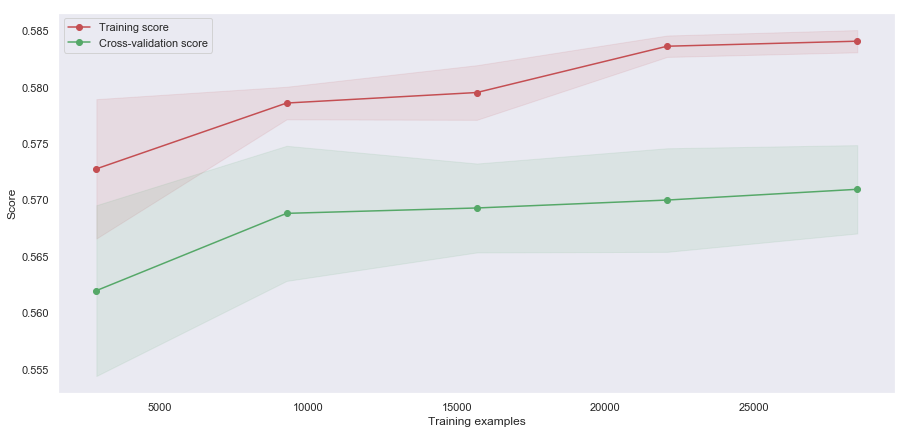

In [734]:
plt.figure()

plt.xlabel("Training examples")
plt.ylabel("Score")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, valid_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")

### Curves for CatBoost

In [752]:
test_pool = Pool(X_holdout_catboost, y_holdout, cat_features=cat_features_catboost)

In [753]:
model.fit(train_pool, eval_set=test_pool, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: -0.9411594	test: -0.9450928	best: -0.9450928 (0)	total: 88.4ms	remaining: 4.33s
10:	learn: -0.8733505	test: -0.8815068	best: -0.8815068 (10)	total: 2.07s	remaining: 7.33s
20:	learn: -0.8594200	test: -0.8758451	best: -0.8756876 (19)	total: 4.12s	remaining: 5.69s
30:	learn: -0.8518628	test: -0.8748427	best: -0.8748427 (30)	total: 6.46s	remaining: 3.96s
40:	learn: -0.8471953	test: -0.8750864	best: -0.8746011 (33)	total: 8.78s	remaining: 1.93s
49:	learn: -0.8416360	test: -0.8761795	best: -0.8746011 (33)	total: 10.9s	remaining: 0us

bestTest = -0.8746011211
bestIteration = 33

Shrink model to first 34 iterations.


### Curves for LightGBM

In [747]:
eval_result = {}
param['metric'] = {'multi_error'}
lgb_model = lgb.train(param, lgb_train, 10000, valid_sets=[lgb_train, lgb_val], verbose_eval=20, evals_result=eval_result)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[20]	training's multi_error: 0.408529	valid_1's multi_error: 0.417884
[40]	training's multi_error: 0.398703	valid_1's multi_error: 0.415198
[60]	training's multi_error: 0.389157	valid_1's multi_error: 0.413822
[80]	training's multi_error: 0.382419	valid_1's multi_error: 0.411726
[100]	training's multi_error: 0.37773	valid_1's multi_error: 0.410481
[120]	training's multi_error: 0.373519	valid_1's multi_error: 0.409302
[140]	training's multi_error: 0.368325	valid_1's multi_error: 0.408713
[160]	training's multi_error: 0.36417	valid_1's multi_error: 0.40904
[180]	training's multi_error: 0.360716	valid_1's multi_error: 0.408778
[200]	training's multi_error: 0.356252	valid_1's multi_error: 0.408975


Plot metrics during training...


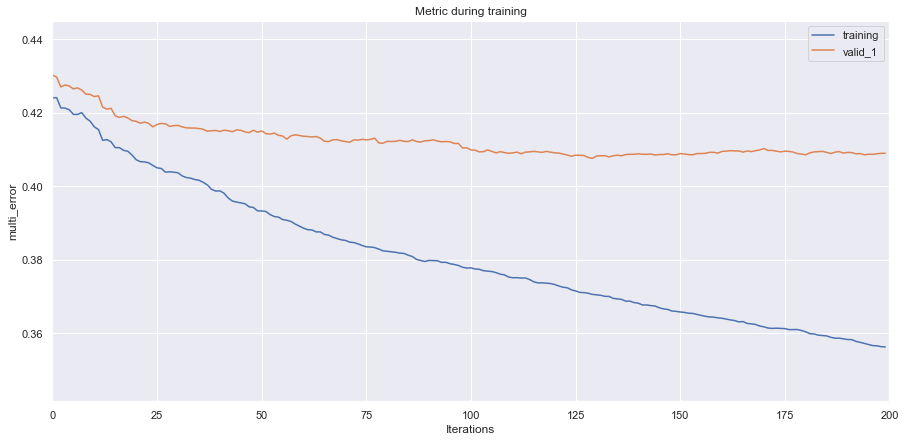

In [750]:
# Print curves
print('Plot metrics during training...')
ax = lgb.plot_metric(eval_result, metric='multi_error')
plt.show()

## Part 9. Prediction for test samples <a class="anchor" id="part9"></a>

In [884]:
res_knn = accuracy_score(y_test, neigh.predict(X_test_knn))

In [885]:
res_catboost = model.score(X_test_catboost, y_test)

In [892]:
lgb_proba = lgb_model.predict(X_test_lgb)
lgb_pred = np.argmax(lgb_proba,axis=1)
res_lgb = accuracy_score(y_test, lgb_pred)

In [893]:
# prediction = (0.31*CatBoost + 0.69*LGB) / 2
catboost_proba = model.predict_proba(X_test_catboost)
blender_proba = 0.31*catboost_proba + 0.69*lgb_proba
blender_pred = np.argmax(blender_proba,axis=1)
res_blender = accuracy_score(y_test, blender_pred)

In [894]:
result = pd.DataFrame({'model':['KNN', 'CatBoost', 'LGB', 'Blender'], 
                       'Test Accuracy':[res_knn, res_catboost, res_lgb, res_blender],
                       'CV Accuracy':[np.mean(res_knn_cv), np.mean(res_catboost_cv), 
                                      np.mean(res_lgb_cv), np.mean(res_blend_cv)]})
result.set_index('model')

,Test Accuracy,CV Accuracy
model,,
KNN,0.542126,0.571468
CatBoost,0.537390,0.588566
LGB,0.544720,0.596054
Blender,0.551324,0.597685


## Part 10. Model evaluation with metrics description <a class="anchor" id="part10"></a>

So we can see accuracy for all our models and compare it for CV and for test data. All accuracies are smaller for test dataset. It usually talks about overfitting, but in this case it is more likely about difference between train and test dataset - for example, `payer_code` has more missings in train data.

Also it can show, that we still have no enough data - if we got more data for training set (not 50/50 but 70/30) maybe model show better result.

Metrics we used - accuracy. We choose this one because it's classical for solution 

From the all models **blender model** show best result on CV and test datasets. But the difference between blender and LGB not so much to use it for production model: **LGB is simplier and faster**.



## Part 11. Conclusions <a class="anchor" id="part11"></a>

Really we got not perfect solution. Accuracy for multi-label classification = 0.55 will not allow to use it in real conditions. It is worth paying more attention to the feature enineering. It may be necessary to increase the sample data, adding new featuress.

Pluses of the solution:
 - we made fast and light model, that use small number of features
 - we go for multi-class solution instead of binary classification as it described in all solutions at Kaggle about this dataset
 - stack models
 - We conducted a broad study that allows us to outline ways for the further development of the project.
 
Minuses:
 - Accuracy is not enough
 - Feature engineering gave no affect

Further research:
 - more attention to features: we can transform them to normally distributed, encode categorical feature as mean/median/ets of numeric groups, generate nore new features (for example split feature for to as it distribution has 2 peaks)
 - still a lot of statistics that we didn't implement (as Cramer V) that can show new dependencies in data
 - always new methods can be applied (NN?) but looks like features are first here

For me:
I study a lot from this progect. Starting from markdown and to blending models. Learned a lot of new statistic tests, data approaches and etc. Work on a large project in a short time does not allow to relax. And although it was possible to do not all that I wanted, the result was obtained. I express my gratitude to the creators of the course!